## Assign Label

Apply labelling strategy.

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
# Functions shared across multiple notebooks are stored in yahoo_data_ext_kit.py which can be found in the same
# directory as the notebooks.

import yahoo_data_ext_kit as ext

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.options.display.float_format = '{:.0f}'.format

In [5]:
DATA_ROOT_DIR='/mnt/data/projects/MD3'
PROJ_ROOT_DIR='/home/priyesh/projects/MD3'

In [6]:
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_income_sheets_final_stage6.pkl')
income_sheets = pd.read_pickle(filepath)
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_cash_sheets_final_stage6.pkl')
cash_sheets = pd.read_pickle(filepath)
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_balance_sheets_final_stage6.pkl')
balance_sheets = pd.read_pickle(filepath)

In [7]:
income_sheets = income_sheets.fillna(0)
cash_sheets = cash_sheets.fillna(0)
balance_sheets = balance_sheets.fillna(0)

In [8]:
income_sheets.head()

company     yahoo_sector  gics_sector                industry  \
3831       A       Healthcare  Health Care  Diagnostics & Research   
3832       A       Healthcare  Health Care  Diagnostics & Research   
3833       A       Healthcare  Health Care  Diagnostics & Research   
3834       A       Healthcare  Health Care  Diagnostics & Research   
945       AA  Basic Materials    Materials                Aluminum   

         st_date st_YR st_Mnth  totalRevenue  costOfRevenue  grossProfit  \
3831  2019-10-31  2019      10    5163000000     2358000000   2805000000   
3832  2020-10-31  2020      10    5339000000     2502000000   2837000000   
3833  2021-10-31  2021      10    6319000000     2912000000   3407000000   
3834  2022-10-31  2022      10    6848000000     3126000000   3722000000   
945   2019-12-31  2019      12   10433000000     8537000000   1896000000   

       netIncome  operatingIncome  netIncomeContinuousOperations  \
3831  1071000000        941000000                     1071000000   
3832   719000000        846000000                      719000000   
3833  1210000000       1347000000                     1210000000   
3834  1254000000       1618000000                     1254000000   
945  -1125000000        876000000                     -853000000   

      netInterestIncome  interestIncome  otherIncomeExpense  operatingExpense  \
3831          -38000000        36000000            16000000        1864000000   
3832          -70000000         8000000            66000000        1991000000   
3833          -79000000         2000000            92000000        2060000000   
3834          -75000000         9000000           -39000000        2104000000   
945          -121000000               0         -1193000000        1020000000   

      totalExpenses  taxProvision  interestExpense        SGA  \
3831     4222000000    -152000000         74000000 1460000000   
3832     4493000000     123000000         78000000 1496000000   
3833     4972000000     150000000         81000000 1619000000   
3834     5230000000     250000000         84000000 1637000000   
945      9557000000     415000000        121000000  280000000   

      researchAndDevelopment       ebit  dilutedEPS  basicEPS  
3831               404000000  993000000           3         3  
3832               495000000  920000000           2         2  
3833               441000000 1441000000           4         4  
3834               467000000 1588000000           4         4  
945                 27000000 -317000000          -6        -6

## Balance Sheets

In [9]:
# Calculate Totals

balance_sheets['totalDebt'] = balance_sheets['currentDebt'] + balance_sheets['longTermDebt']
balance_sheets['totalAssets'] = balance_sheets['currentAssets'] + balance_sheets['totalNonCurrentAssets']
balance_sheets['totalLiabilities'] = balance_sheets['currentLiabilities'] + balance_sheets['totalNonCurrentLiabilities']
balance_sheets['workingCapital'] = balance_sheets['currentAssets'] - balance_sheets['currentLiabilities']

In [10]:
# Calculate Ratios 

balance_sheets['quickRatio'] = (balance_sheets['currentAssets'] - balance_sheets['inventory']) / balance_sheets['currentLiabilities']
balance_sheets['currentRatio'] = balance_sheets['currentAssets'] / balance_sheets['currentLiabilities']
balance_sheets['debtCapitalRatio'] = 100 * balance_sheets['totalDebt'] / (balance_sheets['totalDebt'] + balance_sheets['stockholdersEquity'])
balance_sheets['debtAssetRatio'] = 100 * balance_sheets['totalDebt'] / balance_sheets['totalAssets']


In [11]:
list(balance_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'cashEquivalent',
 'receivables',
 'finishedGoods',
 'workInProcess',
 'rawMaterials',
 'otherCurrentAssets',
 'inventory',
 'currentAssets',
 'netPPE',
 'otherNonCurrentAssets',
 'financialAssets',
 'goodwill',
 'goodwillAndOtherIntangibleAssets',
 'otherIntangibleAssets',
 'nonCurrentAccountsReceivable',
 'totalNonCurrentAssets',
 'currentDebt',
 'payablesAndAccruedExpenses',
 'otherCurrentLiabilities',
 'currentLiabilities',
 'longTermDebt',
 'otherNonCurrentLiabilities',
 'nonCurrentDeferredLiabilities',
 'nonCurrentDeferredTaxesLiabilities',
 'longTermProvisions',
 'totalNonCurrentLiabilities',
 'retainedEarnings',
 'stockholdersEquity',
 'totalDebt',
 'totalAssets',
 'totalLiabilities',
 'workingCapital',
 'quickRatio',
 'currentRatio',
 'debtCapitalRatio',
 'debtAssetRatio']

In [12]:
pd.options.display.float_format = '{:.2f}'.format

# Generate a dataframe with median values for each company

cols=['cashEquivalent',
      'receivables',
      'finishedGoods',
      'workInProcess',
      'rawMaterials',
      'otherCurrentAssets',
      'inventory',
      'currentAssets',
      'netPPE',
      'otherNonCurrentAssets',
      'financialAssets',
      'goodwill',
      'goodwillAndOtherIntangibleAssets',
      'otherIntangibleAssets',
      'nonCurrentAccountsReceivable',
      'totalNonCurrentAssets',
      'currentDebt',
      'payablesAndAccruedExpenses',
      'otherCurrentLiabilities',
      'currentLiabilities',
      'longTermDebt',
      'otherNonCurrentLiabilities',
      'nonCurrentDeferredLiabilities',
      'nonCurrentDeferredTaxesLiabilities',
      'longTermProvisions',
      'totalNonCurrentLiabilities',
      'retainedEarnings',
      'stockholdersEquity',
      'totalDebt',
      'totalAssets',
      'totalLiabilities',
      'workingCapital',
      'quickRatio',
      'currentRatio',
      'debtCapitalRatio',
      'debtAssetRatio']

df_company_bal_median = balance_sheets.groupby(['company','industry'])[cols].median().round(2).reset_index()
df_company_bal_median

company                                industry  cashEquivalent  \
0         A                  Diagnostics & Research   1411500000.00   
1        AA                                Aluminum   1485000000.00   
2       AAL                                Airlines   7914500000.00   
3       AAP                        Specialty Retail    510046500.00   
4      AAPL                    Consumer Electronics  76791000000.00   
5      ABBV              Drug Manufacturers—General   9529500000.00   
6       ABC                    Medical Distribution   3381191500.00   
7      ABNB                         Travel Services   7356866500.00   
8       ABT                         Medical Devices   8659000000.00   
9      ACHC                 Medical Care Facilities    129002500.00   
10      ACI                          Grocery Stores   1093850000.00   
11      ACM              Engineering & Construction   1200702500.00   
12      ACN         Information Technology Services   8033137000.00   
13     ADBE                 Software—Infrastructure   5895000000.00   
14      ADI                          Semiconductors   1263216000.00   
15      ADM                           Farm Products    897500000.00   
16      ADP          Staffing & Employment Services   1928850000.00   
17     ADSK                    Software—Application   1850450000.00   
18      ADT          Security & Protection Services    127000000.00   
19      AEE            Utilities—Regulated Electric     77500000.00   
20      AEP            Utilities—Regulated Electric    608650000.00   
21      AES                   Utilities—Diversified   1426500000.00   
22     AFRM                 Software—Infrastructure    893503000.00   
23     AGCO     Farm & Heavy Construction Machinery    839300000.00   
24      AGR            Utilities—Regulated Electric    826000000.00   
25     AKAM                 Software—Infrastructure   1101694500.00   
26       AL               Rental & Leasing Services    926459000.00   
27      ALB                     Specialty Chemicals    679917000.00   
28     ALGN                         Medical Devices    980213500.00   
29      ALK                                Airlines   2766500000.00   
30     ALLE          Security & Protection Services    376600000.00   
31     ALNY                           Biotechnology   2033400500.00   
32     ALSN                              Auto Parts    212000000.00   
33       AM                     Oil & Gas Midstream       320000.00   
34     AMAT     Semiconductor Equipment & Materials   4538500000.00   
35      AMC                           Entertainment    469900000.00   
36     AMCR                  Packaging & Containers    759000000.00   
37      AMD                          Semiconductors   2949000000.00   
38      AME          Specialty Industrial Machinery    369901000.00   
39     AMED                 Medical Care Facilities     41617000.00   
40     AMGN              Drug Manufacturers—General   9108000000.00   
41     AMZN                         Internet Retail  77211000000.00   
42       AN                Auto & Truck Dealerships     66500000.00   
43     ANET                       Computer Hardware   2948298500.00   
44     ANSS                    Software—Application    770205000.00   
45      AOS          Specialty Industrial Machinery    591400000.00   
46      APA                           Oil & Gas E&P    254500000.00   
47      APD                     Specialty Chemicals   4551250000.00   
48      APH                   Electronic Components   1337800000.00   
49      APP                    Software—Application    738365500.00   
50     APTV                              Auto Parts   2176000000.00   
51     ARMK             Specialty Business Services    431021500.00   
52      ARW     Electronics & Computer Distribution    261148500.00   
53      ASH                     Specialty Chemicals    343000000.00   
54      ATO                 Utilities—Regulated Gas     38052000.00   
55      ATR          Medical

In [13]:
mask=df_company_bal_median['currentRatio'] < 0.80
df_company_bal_median[mask] \
[['company','industry','quickRatio','currentRatio','debtCapitalRatio','debtAssetRatio']].sort_values(by=['currentRatio'])

company                         industry  quickRatio  currentRatio  \
189     DTM              Oil & Gas Midstream        0.29          0.29   
560    SIRI                    Entertainment        0.33          0.33   
121    CHTR                 Telecom Services        0.36          0.36   
336     KDP          Beverages—Non-Alcoholic        0.28          0.41   
526     RCL                  Travel Services        0.41          0.43   
35      AMC                    Entertainment        0.42          0.44   
20      AEP     Utilities—Regulated Electric        0.34          0.45   
481    PDCE                    Oil & Gas E&P        0.46          0.46   
380     MAR                          Lodging        0.48          0.48   
56     ATUS                 Telecom Services        0.48          0.48   
414    MSGS                    Entertainment        0.49          0.49   
656    VRSK              Consulting Services        0.49          0.49   
542     RRC                    Oil & Gas E&P        0.49          0.49   
428     NEE     Utilities—Regulated Electric        0.44          0.52   
363     LNT     Utilities—Regulated Electric        0.40          0.52   
579     SRE            Utilities—Diversified        0.48          0.52   
554     SCI                Personal Services        0.50          0.53   
434     NFG             Oil & Gas Integrated        0.41          0.55   
387     MCW                Personal Services        0.52          0.57   
589     SWN                    Oil & Gas E&P        0.57          0.57   
218    EVRG     Utilities—Regulated Electric        0.40          0.59   
470     OVV                    Oil & Gas E&P        0.59          0.59   
215     ETR     Utilities—Regulated Electric        0.41          0.61   
190     DUK     Utilities—Regulated Electric        0.41          0.62   
18      ADT   Security & Protection Services        0.46          0.62   
389    MDLZ                    Confectioners        0.44          0.63   
424    NCLH                  Travel Services        0.60          0.63   
161     DAL                         Airlines        0.58          0.63   
212      ES     Utilities—Regulated Electric        0.57          0.63   
436      NI          Utilities—Regulated Gas        0.46          0.63   
457     OGE     Utilities—Regulated Electric        0.43          0.63   
117    CHDN                         Gambling        0.64          0.64   
63      AWK        Utilities—Regulated Water        0.63          0.64   
201     EIX     Utilities—Regulated Electric        0.58          0.64   
342     KMI              Oil & Gas Midstream        0.56          0.64   
482     PEG     Utilities—Regulated Electric        0.50          0.65   
691    WTRG        Utilities—Regulated Water        0.51          0.65   
334       K                   Packaged Foods        0.40          0.66   
508     PPL     Utilities—Regulated Electric        0.56          0.66   
674     WEC     Utilities—Regulated Electric        0.50          0.67   
80     BFAM                Personal Services        0.67          0.67   
232      FE     Utilities—Regulated Electric        0.59          0.67   
160       D     Utilities—Regulated Electric        0.55          0.68   
545     RSG                 Waste Management        0.65          0.68   
594     TAP                Beverages—Brewers        0.50          0.69   
2       AAL                         Airlines        0.59          0.69   
395     MKC                   Packaged Foods        0.33          0.69   
681     WMB              Oil & Gas Midstream        0.63          0.70   
538     ROL                Personal Services        0.65          0.71   
54      ATO          Utilities—Regulated Gas        0.60          0.71   
249    GDDY          Software—Infrastructure        0.71          0.71   
669     WBA         Pharmaceutical Retailers        0.36          0.72   
489      PG    Household & Personal Products        0.55          0.72   
142     

In [14]:
mask=df_company_bal_median['industry'].isin(['Discount Stores','Apparel Retail','Department Stores'])
df_company_bal_median[mask] \
[['company','industry','quickRatio','currentRatio','debtCapitalRatio','debtAssetRatio']].sort_values(by=['industry'])

company           industry  quickRatio  currentRatio  debtCapitalRatio  \
96     BURL     Apparel Retail        0.68          1.25             86.42   
606     TJX     Apparel Retail        0.67          1.25             67.13   
145     CRI     Apparel Retail        1.39          2.39             62.09   
540    ROST     Apparel Retail        1.27          1.73             57.58   
267     GPS     Apparel Retail        0.71          1.41             71.39   
661    VSCO     Apparel Retail        0.39          0.97             78.92   
370    LULU     Apparel Retail        1.42          2.26             24.85   
345     KSS  Department Stores        0.50          1.60             57.87   
333     JWN  Department Stores        0.40          0.94             87.58   
377       M  Department Stores        0.38          1.19             63.19   
603     TGT    Discount Stores        0.31          0.95             54.81   
85       BJ    Discount Stores        0.13          0.74             86.56   
181    DLTR    Discount Stores        0.26          1.35             56.66   
171      DG    Discount Stores        0.13          1.18             68.29   
139    COST    Discount Stores        0.52          1.02             33.33   
462    OLLI    Discount Stores        1.04          2.81             24.66   
683     WMT    Discount Stores        0.25          0.87             43.60   

     debtAssetRatio  
96            64.78  
606           46.22  
145           50.17  
540           41.88  
267           54.27  
661           54.73  
370           19.09  
345           44.51  
333           52.75  
377           38.37  
603           31.16  
85            55.94  
181           46.24  
171           53.33  
139           16.06  
462           21.72  
683           24.63

In [15]:

mask=df_company_bal_median['industry'].isin(['Internet Content & Information'])
df_company_bal_median[mask] \
[['company','industry','quickRatio','currentRatio','debtCapitalRatio','debtAssetRatio']].sort_values(by=['industry'])

company                        industry  quickRatio  currentRatio  \
163    DASH  Internet Content & Information        2.60          2.60   
264    GOOG  Internet Content & Information        2.98          3.00   
300     IAC  Internet Content & Information        3.03          3.03   
391    META  Internet Content & Information        3.78          3.78   
417    MTCH  Internet Content & Information        1.81          1.81   
494    PINS  Internet Content & Information       11.62         11.62   
576    SPOT  Internet Content & Information        1.08          1.08   
631    TWLO  Internet Content & Information        7.93          7.93   
704       Z  Internet Content & Information        3.91          4.64   

     debtCapitalRatio  debtAssetRatio  
163              9.74            7.79  
264             10.26            8.01  
300             24.06           18.09  
391              9.63            8.05  
417            107.91           84.65  
494              7.58            7.05  
576             32.30           17.09  
631             10.39            9.79  
704             38.47           37.32

In [16]:
mask=df_company_bal_median['industry'].isin(['Home Improvement Retail','Restaurants'])
df_company_bal_median[mask] \
[['company','industry','quickRatio','currentRatio','debtCapitalRatio','debtAssetRatio']].sort_values(by=['industry'])

company                 industry  quickRatio  currentRatio  \
240     FND  Home Improvement Retail        0.24          1.36   
279      HD  Home Improvement Retail        0.31          1.15   
365     LOW  Home Improvement Retail        0.15          1.06   
129     CMG              Restaurants        1.56          1.59   
185     DPZ              Restaurants        1.48          1.60   
384     MCD              Restaurants        1.21          1.22   
552    SBUX              Restaurants        0.76          0.99   
675     WEN              Restaurants        1.61          1.62   
703     YUM              Restaurants        1.00          1.00   

     debtCapitalRatio  debtAssetRatio  
240             53.67           41.61  
279            100.40           65.13  
365            107.20           63.00  
129             61.08           53.39  
185            477.18          315.65  
384            116.00           97.17  
552            151.19           80.14  
675             88.81           74.98  
703            394.90          195.21

In [17]:
pd.options.display.float_format = '{:.2f}'.format

# Generate a dataframe with median values for ratios each industry

cols=['quickRatio',
      'currentRatio',
      'debtCapitalRatio',
      'debtAssetRatio']

df_industry_bal_median = df_company_bal_median.groupby('industry')[cols].median().round(2).reset_index()
df_industry_bal_median.sort_values(by='debtAssetRatio')

industry  quickRatio  currentRatio  \
72                               Publishing        1.67          1.67   
30            Education & Training Services        2.78          2.78   
45              Health Information Services        3.32          3.46   
51           Internet Content & Information        3.03          3.03   
90           Staffing & Employment Services        1.31          1.31   
96                                 Trucking        1.66          1.70   
4                                  Aluminum        0.95          1.60   
43                                     Gold        2.74          3.93   
64                     Oil & Gas Integrated        0.60          0.92   
60                     Medical Distribution        0.57          1.03   
33           Electronic Gaming & Multimedia        1.77          1.78   
34      Electronics & Computer Distribution        1.07          1.46   
102                     Utilities—Renewable        0.92          1.10   
10                        Beverages—Brewers        0.71          1.08   
13                            Biotechnology        4.76          5.02   
40                   Footwear & Accessories        2.10          2.99   
83                     Software—Application        1.47          1.47   
86              Specialty Business Services        2.20          2.32   
76                 Residential Construction        1.45          5.78   
82                           Semiconductors        1.80          2.34   
9                                Auto Parts        1.29          1.72   
67         Other Industrial Metals & Mining       12.48         13.15   
61           Medical Instruments & Supplies        1.62          2.25   
35               Engineering & Construction        1.36          1.40   
0                      Advertising Agencies        0.95          0.99   
57                          Marine Shipping        1.20          1.87   
66           Oil & Gas Refining & Marketing        1.09          1.73   
1                       Aerospace & Defense        1.15          2.14   
31             Electrical Equipment & Parts        1.38          2.04   
32                    Electronic Components        1.65          2.40   
79       Scientific & Technical Instruments        2.23          3.06   
50           Integrated Freight & Logistics        1.45          1.46   
88           Specialty Industrial Machinery        1.38          1.94   
17                  Communication Equipment        1.41          1.62   
18                        Computer Hardware        1.32          2.06   
62                            Oil & Gas E&P        1.00          1.16   
91                                    Steel        1.96          3.37   
63           Oil & Gas Equipment & Services        1.38          1.89   
59                          Medical Devices        2.32          3.17   
81      Semiconductor Equipment & Materials        2.51          3.26   
38                            Farm Products        0.82          1.68   
94                      Tools & Accessories        1.13          1.87   
8                        Auto Manufacturers        1.06          1.32   
20                            Conglomerates        1.11          1.62   
2                       Agricultural Inputs        1.06          1.63   
27                          Discount Stores        0.26          1.02   
14                       Building Materials        1.62          2.34   
23                                   Copper        2.08          2.83   
16                                Chemicals        1.16          1.69   
48                  Industrial Distribution        1.30          2.50   
11                  Beverages—Non-Alcoholic        0.81          0.99   
22                     Consumer Electronics        1.17          1.22   
73                                Railroads        0.72          0.88   
85                                    Solar        2.75          2.92   
28               Dru

In [18]:
# Convert to a dictionaries for easy lookup

company_bal_median = df_company_bal_median.set_index('company').T.to_dict()
industry_bal_median = df_industry_bal_median.set_index('industry').T.to_dict()

## Income Sheets

In [19]:
list(income_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'totalRevenue',
 'costOfRevenue',
 'grossProfit',
 'netIncome',
 'operatingIncome',
 'netIncomeContinuousOperations',
 'netInterestIncome',
 'interestIncome',
 'otherIncomeExpense',
 'operatingExpense',
 'totalExpenses',
 'taxProvision',
 'interestExpense',
 'SGA',
 'researchAndDevelopment',
 'ebit',
 'dilutedEPS',
 'basicEPS']

In [20]:
income_sheets.head()

company     yahoo_sector  gics_sector                industry  \
3831       A       Healthcare  Health Care  Diagnostics & Research   
3832       A       Healthcare  Health Care  Diagnostics & Research   
3833       A       Healthcare  Health Care  Diagnostics & Research   
3834       A       Healthcare  Health Care  Diagnostics & Research   
945       AA  Basic Materials    Materials                Aluminum   

         st_date st_YR st_Mnth   totalRevenue  costOfRevenue   grossProfit  \
3831  2019-10-31  2019      10  5163000000.00  2358000000.00 2805000000.00   
3832  2020-10-31  2020      10  5339000000.00  2502000000.00 2837000000.00   
3833  2021-10-31  2021      10  6319000000.00  2912000000.00 3407000000.00   
3834  2022-10-31  2022      10  6848000000.00  3126000000.00 3722000000.00   
945   2019-12-31  2019      12 10433000000.00  8537000000.00 1896000000.00   

          netIncome  operatingIncome  netIncomeContinuousOperations  \
3831  1071000000.00     941000000.00                  1071000000.00   
3832   719000000.00     846000000.00                   719000000.00   
3833  1210000000.00    1347000000.00                  1210000000.00   
3834  1254000000.00    1618000000.00                  1254000000.00   
945  -1125000000.00     876000000.00                  -853000000.00   

      netInterestIncome  interestIncome  otherIncomeExpense  operatingExpense  \
3831       -38000000.00     36000000.00         16000000.00     1864000000.00   
3832       -70000000.00      8000000.00         66000000.00     1991000000.00   
3833       -79000000.00      2000000.00         92000000.00     2060000000.00   
3834       -75000000.00      9000000.00        -39000000.00     2104000000.00   
945       -121000000.00            0.00      -1193000000.00     1020000000.00   

      totalExpenses  taxProvision  interestExpense           SGA  \
3831  4222000000.00 -152000000.00      74000000.00 1460000000.00   
3832  4493000000.00  123000000.00      78000000.00 1496000000.00   
3833  4972000000.00  150000000.00      81000000.00 1619000000.00   
3834  5230000000.00  250000000.00      84000000.00 1637000000.00   
945   9557000000.00  415000000.00     121000000.00  280000000.00   

      researchAndDevelopment          ebit  dilutedEPS  basicEPS  
3831            404000000.00  993000000.00        3.37      3.41  
3832            495000000.00  920000000.00        2.30      2.33  
3833            441000000.00 1441000000.00        3.94      3.98  
3834            467000000.00 1588000000.00        4.18      4.19  
945              27000000.00 -317000000.00       -6.07     -6.07

In [21]:
cols=['totalRevenue',
      'costOfRevenue',
      'grossProfit',
      'netIncome',
      'operatingIncome',
      'netIncomeContinuousOperations',
      'netInterestIncome',
      'otherIncomeExpense',
      'operatingExpense',
      'totalExpenses',
      'taxProvision',
      'SGA',
      'researchAndDevelopment',
      'ebit',
      'dilutedEPS',
      'basicEPS']

df_company_inc_median = income_sheets.groupby(['company','industry'])[cols].median().reset_index()

# Convert to a dictionaries for easy lookup

company_inc_median = df_company_inc_median.set_index('company').T.to_dict()

In [22]:
# Convert to a dictionaries for easy lookup

company_inc_median = df_company_inc_median.set_index('company').T.to_dict()

Investigate effect of setting a threshold of 10000000 for totalRevenue

In [23]:
income_sheets[income_sheets['totalRevenue'] < 100000000]

company            yahoo_sector             gics_sector  \
485    LBRDA  Communication Services  Communication Services   
486    LBRDA  Communication Services  Communication Services   
1114      MP         Basic Materials               Materials   
4192    MRNA              Healthcare             Health Care   
4186    MRTX              Healthcare             Health Care   
4187    MRTX              Healthcare             Health Care   
4182    MRTX              Healthcare             Health Care   
4183    MRTX              Healthcare             Health Care   
4210    NVAX              Healthcare             Health Care   
2147    PLUG             Industrials             Industrials   
3640      QS       Consumer Cyclical  Consumer Discretionary   
3641      QS       Consumer Cyclical  Consumer Discretionary   
3642      QS       Consumer Cyclical  Consumer Discretionary   
3638      QS       Consumer Cyclical  Consumer Discretionary   
3655    RIVN       Consumer Cyclical  Consumer Discretionary   
3656    RIVN       Consumer Cyclical  Consumer Discretionary   
3657    RIVN       Consumer Cyclical  Consumer Discretionary   
3003       S              Technology  Information Technology   
3004       S              Technology  Information Technology   

                              industry     st_date st_YR st_Mnth  \
485                   Telecom Services  2019-12-31  2019      12   
486                   Telecom Services  2020-12-31  2020      12   
1114  Other Industrial Metals & Mining  2019-12-31  2019      12   
4192                     Biotechnology  2019-12-31  2019      12   
4186                     Biotechnology  2019-12-31  2019      12   
4187                     Biotechnology  2020-12-31  2020      12   
4182                     Biotechnology  2021-12-31  2021      12   
4183                     Biotechnology  2022-12-31  2022      12   
4210                     Biotechnology  2019-12-31  2019      12   
2147      Electrical Equipment & Parts  2020-12-31  2020      12   
3640                        Auto Parts  2019-12-31  2019      12   
3641                        Auto Parts  2020-12-31  2020      12   
3642                        Auto Parts  2021-12-31  2021      12   
3638                        Auto Parts  2022-12-31  2022      12   
3655                Auto Manufacturers  2019-12-31  2019      12   
3656                Auto Manufacturers  2020-12-31  2020      12   
3657                Auto Manufacturers  2021-12-31  2021      12   
3003           Software—Infrastructure  2020-01-31  2020      01   
3004           Software—Infrastructure  2021-01-31  2021      01   

      totalRevenue  costOfRevenue   grossProfit      netIncome  \
485    14859000.00           0.00   14859000.00   117216000.00   
486    50706000.00           0.00   50706000.00   397619000.00   
1114   73411000.00    67833000.00    5578000.00    -6755000.00   
4192   48036000.00           0.00   48036000.00  -514021000.00   
4186    3335000.00           0.00    3335000.00  -212846000.00   
4187   13398000.00           0.00   13398000.00  -358067000.00   
4182   72092000.00           0.00   72092000.00  -582475000.00   
4183   12436000.00      600000.00   11836000.00  -740867000.00   
4210   18662000.00           0.00   18662000.00  -132694000.00   
2147 -100469000.00   322874000.00 -423343000.00  -561682000.00   
3640          0.00           0.00          0.00   -51283000.00   
3641          0.00           0.00          0.00 -1099914000.00   
3642          0.00           0.00          0.00   -45966000.00   
3638          0.00           0.00          0.00  -411907000.00   
3655          0.00           0.00          0.00  -426000000.00   
3656          0.00           0.00          0.00 -1018000000.00   
3657   55000000.00   520000000.00 -465000000.00 -4688000000.00   
3003   46474000.00    18331000.00   28143000.00   -76567000.00   
3004   93056000.00    39332000.00   53724000.00  -117573000.00   

      operatingIncome  netIncomeContinuous

One occurrence of a negative value. This is most likely due to an accounting anomaly. 0 sales for RVN and QS as 
they are startups.

In [24]:
# Check effect on median values

mask=df_company_inc_median['totalRevenue'] < 100000000
df_company_inc_median[mask]

company            industry  totalRevenue  costOfRevenue   grossProfit  \
409    MRTX       Biotechnology   12917000.00           0.00   12617000.00   
521      QS          Auto Parts          0.00           0.00          0.00   
532    RIVN  Auto Manufacturers   27500000.00   260000000.00 -232500000.00   

         netIncome  operatingIncome  netIncomeContinuousOperations  \
409  -470271000.00    -471272000.00                  -469860500.00   
521  -231595000.00    -148143500.00                  -231579500.00   
532 -2853000000.00   -2620500000.00                 -2853000000.00   

     netInterestIncome  otherIncomeExpense  operatingExpense  totalExpenses  \
409               0.00         10137000.00      514017000.00   514017000.00   
521         1989000.00           628500.00      148143500.00   148143500.00   
532        -7000000.00                0.00     2377000000.00  2648000000.00   

     taxProvision          SGA  researchAndDevelopment           ebit  \
409     254000.00 110045500.00            403971500.00  -471272000.00   
521          0.00  39844000.00            108299500.00  -230333000.00   
532          0.00 748500000.00           1308000000.00 -2834500000.00   

     dilutedEPS  basicEPS  
409       -9.59     -9.59  
521       -0.73     -0.58  
532       -3.31     -3.31

In [25]:
# Check where cost of revenue is 0
mask=df_company_inc_median['costOfRevenue'] == 0
df_company_inc_median[mask]

company             industry   totalRevenue  costOfRevenue    grossProfit  \
86     BKNG      Travel Services 13012000000.00           0.00 13012000000.00   
189     DTM  Oil & Gas Midstream   797000000.00           0.00   797000000.00   
242     FOX        Entertainment 12606000000.00           0.00 12606000000.00   
347   LBRDA     Telecom Services   512853000.00           0.00   512853000.00   
409    MRTX        Biotechnology    12917000.00           0.00    12617000.00   
445    NVAX        Biotechnology   810944000.00           0.00   777415500.00   
452     NWS        Entertainment  9716000000.00           0.00  9716000000.00   
521      QS           Auto Parts           0.00           0.00           0.00   
541    RPRX        Biotechnology  2179607500.00           0.00  2179607500.00   

        netIncome  operatingIncome  netIncomeContinuousOperations  \
86  2111500000.00    3706000000.00                  2111500000.00   
189  309500000.00     415500000.00                   321000000.00   
242 1400000000.00    2535500000.00                  1438000000.00   
347  564809500.00     -16138500.00                   564804000.00   
409 -470271000.00    -471272000.00                  -469860500.00   
445 -538099000.00    -530727500.00                  -538099000.00   
452  242500000.00     589000000.00                   308500000.00   
521 -231595000.00    -148143500.00                  -231579500.00   
541  797364000.00    1512857500.00                  1471600500.00   

     netInterestIncome  otherIncomeExpense  operatingExpense  totalExpenses  \
86       -253000000.00       -123000000.00     9085000000.00  9085000000.00   
189      -106000000.00        121500000.00      381500000.00   381500000.00   
242      -352500000.00       -277000000.00     9975000000.00  9975000000.00   
347       -72579000.00        759489000.00      528680500.00   528680500.00   
409               0.00         10137000.00      514017000.00   514017000.00   
445       -16947000.00          9986000.00     1308143000.00  1759462500.00   
452       -56000000.00       -131000000.00     9084500000.00  9084500000.00   
521         1989000.00           628500.00      148143500.00   148143500.00   
541      -134803500.00          3790000.00      692874000.00   692874000.00   

     taxProvision           SGA  researchAndDevelopment          ebit  \
86   686500000.00 8640000000.00                    0.00 3056500000.00   
189  102000000.00          0.00                    0.00  543500000.00   
242  521000000.00 1774000000.00                    0.00 2246000000.00   
347  127971000.00  253345500.00                    0.00  728161500.00   
409     254000.00  110045500.00            403971500.00 -471272000.00   
445    2146000.00  221824000.00            991152500.00 -525243000.00   
452   56500000.00 3231000000.00                    0.00  544000000.00   
521          0.00   39844000.00            108299500.00 -230333000.00   
541          0.00  182413000.00            130071000.00 1633171500.00   

     dilutedEPS  basicEPS  
86        52.26     52.55  
189        3.19      3.20  
242        2.34      2.35  
347        3.05      3.08  
409       -9.59     -9.59  
445       -7.84     -7.84  
452        0.41      0.42  
521       -0.73     -0.58  
541        1.41      1.41

In [26]:
# Gross Profit
mask = df_company_inc_median['grossProfit'] < 10000000
df_company_inc_median[mask]

company                      industry  totalRevenue  costOfRevenue  \
106     CCL               Travel Services 8881500000.00 10001000000.00   
499    PLUG  Electrical Equipment & Parts  366290500.00   498263000.00   
521      QS                    Auto Parts          0.00           0.00   
532    RIVN            Auto Manufacturers   27500000.00   260000000.00   
577     SPR           Aerospace & Defense 4491300000.00  4525900000.00   

       grossProfit      netIncome  operatingIncome  \
106 -1119500000.00 -7797000000.00   -5574000000.00   
499  -182833000.00  -510823500.00    -483094000.00   
521           0.00  -231595000.00    -148143500.00   
532  -232500000.00 -2853000000.00   -2620500000.00   
577   -34600000.00  -543250000.00    -366000000.00   

     netIncomeContinuousOperations  netInterestIncome  otherIncomeExpense  \
106                 -7797500000.00     -1206000000.00       -617500000.00   
499                  -510823500.00       -37343500.00        -10487000.00   
521                  -231579500.00         1989000.00           628500.00   
532                 -2853000000.00        -7000000.00                0.00   
577                  -543250000.00      -216600000.00        -10050000.00   

     operatingExpense  totalExpenses  taxProvision           SGA  \
106     4379500000.00 14455500000.00   -1500000.00 2182500000.00   
499      185767500.00   684030500.00   -8098500.00  127877500.00   
521      148143500.00   148143500.00          0.00   39844000.00   
532     2377000000.00  2648000000.00          0.00  748500000.00   
577      324550000.00  4857300000.00   -6000000.00  270300000.00   

     researchAndDevelopment           ebit  dilutedEPS  basicEPS  
106                    0.00 -6196000000.00       -6.81     -6.81  
499             57890000.00  -491600500.00       -1.03     -1.03  
521            108299500.00  -230333000.00       -0.73     -0.58  
532           1308000000.00 -2834500000.00       -3.31     -3.31  
577             51850000.00  -303950000.00       -5.20     -5.20

In [27]:
# Operating Income

mask = df_company_inc_median['operatingIncome'] < 10000000
df_company_inc_median[mask].reset_index()

index company                        industry   totalRevenue  \
0       2     AAL                        Airlines 37825000000.00   
1      22    AFRM         Software—Infrastructure   689996000.00   
2      31    ALNY                   Biotechnology   668570000.00   
3      35     AMC                   Entertainment  3219650000.00   
4      64    AXON             Aerospace & Defense   772192000.00   
5      67     AYX            Software—Application   515721500.00   
6      71      BA             Aerospace & Defense 64447000000.00   
7      83    BILL            Software—Application   197932500.00   
8      90    BMRN                   Biotechnology  1853365000.00   
9     106     CCL                 Travel Services  8881500000.00   
10    107    CDAY            Software—Application   933350000.00   
11    114    CFLT         Software—Infrastructure   312220500.00   
12    149    CRWD         Software—Infrastructure  1163016000.00   
13    156    CVNA        Auto & Truck Dealerships  9200282500.00   
14    163    DASH  Internet Content & Information  3887000000.00   
15    167    DDOG            Software—Application   816125000.00   
16    178    DKNG                        Gambling   955278500.00   
17    217     EVA        Lumber & Wood Production   958378500.00   
18    220    EXAS          Diagnostics & Research  1629239000.00   
19    236    FIVN         Software—Infrastructure   522249500.00   
20    241    FOUR         Software—Infrastructure  1067200000.00   
21    243    FRPT                  Packaged Foods   372139500.00   
22    252     GFS                  Semiconductors  6198894000.00   
23    254      GH          Diagnostics & Research   330191500.00   
24    259     GME                Specialty Retail  5968950000.00   
25    270    GWRE            Software—Application   742787000.00   
26    273       H                         Lodging  4024000000.00   
27    295    HUBS            Software—Application  1091842000.00   
28    300     IAC  Internet Content & Information  4228341000.00   
29    314    IONS                   Biotechnology   769500000.00   
30    325    JAMF            Software—Application   317760000.00   
31    329    JBLU                        Airlines  7065500000.00   
32    347   LBRDA                Telecom Services   512853000.00   
33    373     LVS               Resorts & Casinos  4172000000.00   
34    375    LYFT            Software—Application  3412141500.00   
35    376     LYV                   Entertainment  8908208000.00   
36    388     MDB         Software—Infrastructure   732081000.00   
37    392     MGM               Resorts & Casinos 11289906000.00   
38    409    MRTX                   Biotechnology    12917000.00   
39    411    MRVL                  Semiconductors  3715641500.00   
40    414    MSGS                   Entertainment   712336500.00   
41    424    NCLH                 Travel Services  3061834000.00   
42    425    NCNO            Software—Application   239079000.00   
43    430     NET         Software—Infrastructure   543742500.00   
44    432    NEWR         Software—Infrastructure   726584500.00   
45    438     NOV  Oil & Gas Equipment & Services  6663500000.00   
46    442    NTNX         Software—Infrastructure  1351023000.00   
47    443    NTRA          Diagnostics & Research   508245500.00   
48    445    NVAX                   Biotechnology   810944000.00   
49    446    NVCR                 Medical Devices   514698500.00   
50    460    OKTA         Software—Infrastructure  1067812500.00   
51    468     OSH         Medical Care Facilities  1157682500.00   
52    473    PANW         Software—Infrastructure  3832250000.00   
53    475    PATH         Software—Infrastructure   749947500.00   
54    479    PCOR            Software—Application   457556000.00   
55    483    PEGA            Software—Application  1114585000.00   
56    484     PEN                 Medical Devices   654001000.00   
57    494    PINS  Internet Content & Information  213534250

In [28]:
# DilutedEPS

pd.options.display.float_format = '{:.2f}'.format

mask = df_company_inc_median['dilutedEPS'] < 0
df_company_inc_median[mask][['company','dilutedEPS','basicEPS']].reset_index().sort_values(by='dilutedEPS')

index company  dilutedEPS  basicEPS
82     526     RCL      -14.67    -14.67
53     409    MRTX       -9.59     -9.59
56     424    NCLH       -8.87     -8.87
64     445    NVAX       -7.84     -7.84
7       31    ALNY       -7.79     -7.79
13      71      BA       -7.73     -7.73
97     580    SRPT       -7.57     -7.57
80     523    RARE       -6.91     -6.91
17     106     CCL       -6.81     -6.81
114    666       W       -5.97     -5.97
95     577     SPR       -5.20     -5.20
118    695    WYNN       -5.18     -5.18
50     375    LYFT       -5.04     -5.04
31     217     EVA       -4.92     -4.92
52     388     MDB       -4.64     -4.64
25     159     CZR       -4.51     -4.51
106    631    TWLO       -4.40     -4.40
110    638    UBER       -4.25     -4.25
62     442    NTNX       -4.05     -4.05
99     597    TDOC       -4.04     -4.04
63     443    NTRA       -4.03     -4.03
93     575    SPLK       -3.95     -3.95
61     438     NOV       -3.64     -3.64
66     460    OKTA       -3.62     -3.62
30     211     EQT       -3.61     -3.61
32     220    EXAS       -3.51     -3.51
28     178    DKNG       -3.47     -3.47
9       46     APA       -3.42     -3.42
83     532    RIVN       -3.31     -3.31
39     254      GH       -3.30     -3.30
26     163    DASH       -3.02     -3.02
91     564     SLB       -3.00     -2.99
59     432    NEWR       -2.91     -2.91
117    684    WOLF       -2.70     -2.70
116    678     WIX       -2.56     -2.56
100    599    TEAM       -2.54     -2.54
24     156    CVNA       -2.54     -2.54
84     535     RNG       -2.52     -2.52
37     250      GE       -2.47     -2.47
92     569    SNOW       -2.38     -2.38
89     557    SGEN       -2.13     -2.13
94     576    SPOT       -1.98     -1.63
109    637     UAL       -1.93     -1.92
43     295    HUBS       -1.78     -1.78
108    636       U       -1.77     -1.77
6       22    AFRM       -1.58     -1.58
51     376     LYV       -1.55     -1.55
12      67     AYX       -1.52     -1.52
38     252     GFS       -1.52     -1.52
71     479    PCOR       -1.46     -1.46
1        2     AAL       -1.45     -1.44
120    709      ZS       -1.41     -1.41
8       35     AMC       -1.39     -1.38
49     371    LUMN       -1.34     -1.34
20     114    CFLT       -1.32     -1.32
115    672    WDAY       -1.31     -1.31
67     468     OSH       -1.26     -1.26
40     259     GME       -1.17     -1.17
107    632     TXG       -1.13     -1.13
119    704       Z       -1.10     -1.10
45     314    IONS       -1.05     -1.05
48     337     KEX       -1.04     -1.04
75     499    PLUG       -1.03     -1.03
72     483    PEGA       -0.95     -0.95
88     549       S       -0.95     -0.95
14      83    BILL       -0.95     -0.95
2        7    ABNB       -0.92     -0.92
68     473    PANW       -0.91     -0.91
23     149    CRWD       -0.88     -0.88
22     140    COTY       -0.86     -0.86
47     329    JBLU       -0.84     -0.84
69     475    PATH       -0.83     -0.83
0        1      AA       -0.80     -0.80
21     126    CLVT       -0.79     -0.79
76     509    PRGO       -0.78     -0.78
78     513    PTON       -0.76     -0.76
103    618    TRGP       -0.76     -0.76
79     521      QS       -0.73     -0.58
34     236    FIVN       -0.73     -0.73
81     525    RBLX       -0.72     -0.72
112    662     VST       -0.69     -0.69
86     542     RRC       -0.67     -0.65
35     241    FOUR       -0.66     -0.66
58     430     NET       -0.66     -0.66
77     510    PSTG       -0.65     -0.65
16     101     CAH       -0.64     -0.63
102    613    TOST       -0.63     -0.54
60     433     NFE       -0.58     -0.57
29     203    ELAN       -0.57     -0.57
41     270    GWRE       -0.56     -0.56
70     478     PCG       -0.55     -0.55
74     498    PLTR       -0.55     -0.55
111    658     VRT       -0.52     -0.44
113    663    VTRS       -0.51     -0.51
44     310    INFA       -0.51     -0.51
4       18     ADT       -0.49     -0.49
101    610    TNDM       -0.

In [29]:
# Take a closer look at mature companies with negative EPS

pd.options.display.float_format = '{:.2f}'.format

income_sheets[income_sheets['company'].isin(['RCL','CCL','BA','GE','F'])][['company','st_date','ebit','dilutedEPS']]

company     st_date            ebit  dilutedEPS
1660      BA  2019-12-31  -1537000000.00       -1.12
1661      BA  2020-12-31 -12320000000.00      -20.88
1662      BA  2021-12-31  -2351000000.00       -7.15
1663      BA  2022-12-31  -2489000000.00       -8.30
3293     CCL  2019-11-30   3266000000.00        4.32
3294     CCL  2020-11-30  -9358000000.00      -13.20
3295     CCL  2021-11-30  -7921000000.00       -8.46
3296     CCL  2022-11-30  -4471000000.00       -5.16
3392       F  2019-12-31   9881000000.00        0.01
3393       F  2020-12-31   9142000000.00       -0.32
3394       F  2021-12-31  24835000000.00        4.45
3390       F  2022-12-31   4762000000.00       -0.49
1875      GE  2019-12-31   5376000000.00       -4.99
1876      GE  2020-12-31   8470000000.00        4.63
1877      GE  2021-12-31  -1807000000.00       -6.16
1873      GE  2022-12-31    678000000.00        0.05
3665     RCL  2019-12-31   2316113000.00        8.95
3666     RCL  2020-12-31  -4930892000.00      -27.05
3667     RCL  2021-12-31  -3968746000.00      -20.89
3663     RCL  2022-12-31   -791800000.00       -8.45

Companies would have been affected by pandemic, especially CCL and RCL. 

In [30]:
# Take a closer look at some of immature companies

income_sheets[income_sheets['company'].isin(['MRTX','MRNA','AFRM','UBER','DKNG','RIVN','SNOW','PLUG','PTON'])][['company','st_date','ebit','dilutedEPS']]

company     st_date           ebit  dilutedEPS
2410    AFRM  2019-06-30  -101546000.00       -0.65
2411    AFRM  2020-06-30   -75474000.00       -0.61
2412    AFRM  2021-06-30  -326493000.00       -2.94
2413    AFRM  2022-06-30  -796354000.00       -2.51
3360    DKNG  2019-12-31  -146545000.00       -0.77
3361    DKNG  2020-12-31  -843256000.00       -4.03
3362    DKNG  2021-12-31 -1561617000.00       -3.78
3358    DKNG  2022-12-31 -1511756000.00       -3.16
4192    MRNA  2019-12-31  -545720000.00       -1.55
4190    MRNA  2020-12-31  -763144000.00       -1.96
4191    MRNA  2021-12-31 13296000000.00       28.29
4188    MRNA  2022-12-31  9604000000.00       20.12
4186    MRTX  2019-12-31  -222104000.00       -5.69
4187    MRTX  2020-12-31  -369363000.00       -7.96
4182    MRTX  2021-12-31  -573181000.00      -11.21
4183    MRTX  2022-12-31  -759589000.00      -13.18
2146    PLUG  2019-12-31   -49963000.00       -0.36
2147    PLUG  2020-12-31  -550264000.00       -1.68
2143    PLUG  2021-12-31  -432937000.00       -0.82
2144    PLUG  2022-12-31  -684132000.00       -1.25
3593    PTON  2019-06-30  -202200000.00       -0.88
3594    PTON  2020-06-30   -80900000.00       -0.32
3595    PTON  2021-06-30  -183400000.00       -0.64
3596    PTON  2022-06-30 -2754200000.00       -8.77
3655    RIVN  2019-12-31  -392000000.00       -0.59
3656    RIVN  2020-12-31 -1010000000.00       -1.41
3657    RIVN  2021-12-31 -4659000000.00       -5.21
3653    RIVN  2022-12-31 -6645000000.00       -7.40
3033    SNOW  2020-01-31  -358088000.00       -1.46
3034    SNOW  2021-01-31  -543937000.00       -3.81
3035    SNOW  2022-01-31  -715036000.00       -2.26
3031    SNOW  2023-01-31  -842267000.00       -2.50
2314    UBER  2019-12-31 -7874000000.00       -6.81
2315    UBER  2020-12-31 -6488000000.00       -3.86
2316    UBER  2021-12-31  -542000000.00       -0.29
2317    UBER  2022-12-31 -8861000000.00       -4.65

## Cash Sheets

In [33]:
# Reverse Signs

cash_sheets['repurchaseOfCapitalStock'] = cash_sheets['repurchaseOfCapitalStock'] * -1
cash_sheets['cashDividendsPaid'] = cash_sheets['cashDividendsPaid'] * -1
cash_sheets['commonStockDividendPaid'] = cash_sheets['commonStockDividendPaid'] * -1
cash_sheets['preferredStockDividendPaid'] = cash_sheets['preferredStockDividendPaid'] * -1

In [34]:
list(cash_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'netIncome',
 'netIncomeFromContinuingOperations',
 'depreciation',
 'stockBasedCompensation',
 'cashFlowOperatingActivities',
 'capitalExpenditure',
 'saleOfBusiness',
 'purchaseOfBusiness',
 'netBusinessPurchaseAndSale',
 'saleOfPPE',
 'purchaseOfPPE',
 'netPPEPurchaseAndSale',
 'saleOfInvestment',
 'purchaseOfInvestment',
 'netInvestmentPurchaseAndSale',
 'saleOfInvestmentProperties',
 'purchaseOfInvestmentProperties',
 'netInvestmentPropertiesPurchaseAndSale',
 'saleOfIntangibles',
 'purchaseOfIntangibles',
 'netIntangiblesPurchaseAndSale',
 'netOtherInvestingChanges',
 'cashFlowInvestingActivities',
 'netIssuancePaymentsOfDebt',
 'netLongTermDebtIssuance',
 'netShortTermDebtIssuance',
 'commonStockDividendPaid',
 'preferredStockDividendPaid',
 'cashDividendsPaid',
 'netCommonStockIssuance',
 'netPreferredStockIssuance',
 'repurchaseOfCapitalStock',
 'netOtherFinancingCharges',
 'cashFlowFi

In [36]:
cols = ['netIncome',
        'netIncomeFromContinuingOperations',
        'depreciation',
        'stockBasedCompensation',
        'cashFlowOperatingActivities',
        'capitalExpenditure',
        'purchaseOfBusiness',
        'netLongTermDebtIssuance',
        'netShortTermDebtIssuance',
        'commonStockDividendPaid',
        'preferredStockDividendPaid',
        'cashDividendsPaid',
        'netCommonStockIssuance',
        'netPreferredStockIssuance',
        'repurchaseOfCapitalStock',
        'freeCashFlow']

df_company_cash_median = cash_sheets.groupby(['company','industry'])[cols].median().reset_index()

# Convert to a dictionary for easy lookup

company_cash_median = df_company_cash_median.set_index('company').T.to_dict()

## Create Dictionary for Company


In [37]:
ticker_list = income_sheets['company'].unique()

inc_cols = ['totalRevenue','costOfRevenue','grossProfit','netIncome','operatingIncome','ebit','dilutedEPS']

bal_cols = ['cashEquivalent','receivables','inventory','currentAssets','netPPE','goodwill',
            'totalNonCurrentAssets','currentDebt','payablesAndAccruedExpenses',
            'otherCurrentLiabilities','currentLiabilities','longTermDebt','totalNonCurrentLiabilities',
            'retainedEarnings','stockholdersEquity','totalDebt','totalAssets','totalLiabilities',
            'workingCapital','debtCapitalRatio','debtAssetRatio','quickRatio','currentRatio']

cash_cols = ['netIncome',
             'netIncomeFromContinuingOperations',
             'depreciation',
             'stockBasedCompensation',
             'cashFlowOperatingActivities',
             'capitalExpenditure',
             'purchaseOfBusiness',
             'netLongTermDebtIssuance',
             'netShortTermDebtIssuance',
             'commonStockDividendPaid',
             'preferredStockDividendPaid',
             'cashDividendsPaid',
             'netCommonStockIssuance',
             'netPreferredStockIssuance',
             'repurchaseOfCapitalStock',
             'freeCashFlow']

company = {}

for ticker in ticker_list:
  print(ticker)
  company[ticker] = {}
  company[ticker]['income'] = income_sheets[income_sheets['company'] == ticker]
  company[ticker]['cash'] = cash_sheets[cash_sheets['company'] == ticker]
  company[ticker]['balance'] = balance_sheets[balance_sheets['company'] == ticker]
  company[ticker]['industry'] = income_sheets[income_sheets['company'] == ticker]['industry'].unique()[0]
    
  company[ticker]['inc_trend'] = company[ticker]['income'][inc_cols].apply(lambda x: ext.getTrendScore(x)).to_dict()
  company[ticker]['bal_trend'] = company[ticker]['balance'][bal_cols].apply(lambda x: ext.getTrendScore(x)).to_dict()
  company[ticker]['cash_trend'] = company[ticker]['cash'][cash_cols].apply(lambda x: ext.getTrendScore(x)).to_dict()

  company[ticker]['inc_median'] = company_inc_median[ticker]
  company[ticker]['bal_median'] = company_bal_median[ticker]
  company[ticker]['cash_median'] = company_cash_median[ticker]

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


### Score Income Sheet

0 - Poor
4 - Excellent

If Revenue is low or zero then disregard.

If gross profit is low or negative then the business is not viable as it currently stands.

If Operating Income is low or negative then general admin costs, marketing, R&D required for the business operation 
renders the business not profitable.

If net income is low or negative then having allowed for all costs including tax and interest, the business is 
not making any money.

If any of the above applies then we need to apply a ceiling, so that at best the rating applied is 2 (hold). 
Taking a mean of scores and applying a ceiling of 3 will result in a rating of 3 where several factors indicate 
a positive trend and also weigh up the relative strength of trends. if the positive trends are weak and offset by 
declining trends in other factors then the net effect is to push rating to 0 or 1 (indicating sell or strong sell).

Where business is making money:
    
Declining sales revenue is a concern.

Declining gross profit is a worrying indicator even if sales are increasing.

Declining operating income indicates that general costs including marketing and overheads are increasing even if 
trends for sales and profit are positive.

Declining net income indicates that effect of tax and interest is affecting the profitability of the business. 

Taking a mean score will work as strong declines in any factor prevent it from getting top score. More than one 
decline will take the score to a hold or below:
    
    4 4 4 -> 4
    2 4 4 -> 3
    1 4 4 -> 3
    2 3 4 -> 3
    2 2 4 -> 2
    

In [38]:
def scoreIncome(incomeTrend,incomeMedian):

  '''
  Score company on basis of income sheet
  '''

  revenueThreshold = 100000000
  grossProfitThreshold = 1000000

  s1 = {}

  # Total Revenue
    
  # If the revenue is below threshold then assign lowest score of 0. Otherwise, consider trend, distinguishing
  # positive and negative trends and degree of gradient. 

  feature = 'totalRevenue'

  if incomeMedian[feature] < revenueThreshold:
    s1[feature] = 0
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Gross Profit

  # Only consider companies which are making a profit above threshold.Favour ones with positive trend.

  feature = 'grossProfit'

  if incomeMedian['grossProfit'] < grossProfitThreshold:
    s1[feature] = 0
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Operating Income

  # Gives us an indication of the effect of general costs including admin, marketing and R&D. Instead of looking
  # at SGA which may be rising in line with growth in business, the trend for operating income is a good indicator
  # of general direction.
    
  # If it is negative then the business is making a loss having taken into consideration of its operating costs.
  # As this brings into question whether the business is viable based on past performance.
    
  feature = 'operatingIncome'

  if incomeMedian[feature] < 0:
    s1[feature] = 0
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Net Income

  feature = 'netIncome'

  if incomeMedian[feature] < 0:
    # If there is a strong positive trend then set score to 1 otherwise 0
    if incomeTrend[feature] >= 2:  
      s1[feature] = 0
    else:
      s1[feature] = 1
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Diluted EPS

  feature = 'dilutedEPS'
    
  if incomeMedian[feature] < 0:
    # If there is a strong positive trend then set score to 1 otherwise 0
    if incomeTrend[feature] >= 2:  
      s1[feature] = 0
    else:
      s1[feature] = 1
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Scoring

  # Determine mean score. If any of the scores are 0 then apply a ceiling of 2.
  
  l_scores = list(s1.values())
    
  meanScore = int(np.mean(l_scores))

  if min(l_scores) == 0:
    if meanScore > 2:
      meanScore = 2

  score = {'score': meanScore,
           'scoreBreakdown': s1}

  return score


In [39]:
l_score = []

for ticker in company:
    
  print(ticker)
  company[ticker]['incomeScore'] = scoreIncome(company[ticker]['inc_trend'],company[ticker]['inc_median'])  
 
  S = pd.Series({'company': ticker,
                 'industry': company[ticker]['industry'],
                 'incomeScore': company[ticker]['incomeScore']['score'],
                 'totalRevenue': company[ticker]['incomeScore']['scoreBreakdown']['totalRevenue'],
                 'grossProfit': company[ticker]['incomeScore']['scoreBreakdown']['grossProfit'],
                 'operatingIncome': company[ticker]['incomeScore']['scoreBreakdown']['operatingIncome'],
                 'netIncome': company[ticker]['incomeScore']['scoreBreakdown']['netIncome'],
                 'dilutedEPS': company[ticker]['incomeScore']['scoreBreakdown']['dilutedEPS']})
                  
  l_score.append(S)

df_incomeScore = pd.DataFrame(l_score)

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


In [40]:
pd.options.display.float_format = '{:.2f}'.format
df_incomeScore.sort_values(by='incomeScore')

company                                industry  incomeScore  \
532    RIVN                      Auto Manufacturers            0   
371    LUMN                        Telecom Services            0   
521      QS                              Auto Parts            0   
106     CCL                         Travel Services            0   
577     SPR                     Aerospace & Defense            0   
314    IONS                           Biotechnology            0   
300     IAC          Internet Content & Information            1   
578    SRCL                        Waste Management            1   
662     VST   Utilities—Independent Power Producers            1   
438     NOV          Oil & Gas Equipment & Services            1   
259     GME                        Specialty Retail            1   
513    PTON                                 Leisure            1   
262    GNTX                              Auto Parts            1   
580    SRPT                           Biotechnology            1   
693     WWD                     Aerospace & Defense            1   
638    UBER                    Software—Application            1   
373     LVS                       Resorts & Casinos            1   
252     GFS                          Semiconductors            1   
329    JBLU                                Airlines            1   
250      GE          Specialty Industrial Machinery            1   
376     LYV                           Entertainment            1   
337     KEX                         Marine Shipping            1   
375    LYFT                    Software—Application            1   
547     RUN                                   Solar            1   
684    WOLF                          Semiconductors            1   
71       BA                     Aerospace & Defense            1   
458     OGN              Drug Manufacturers—General            1   
424    NCLH                         Travel Services            1   
526     RCL                         Travel Services            1   
64     AXON                     Aerospace & Defense            1   
241    FOUR                 Software—Infrastructure            1   
238     FLS          Specialty Industrial Machinery            1   
574     SPB           Household & Personal Products            1   
482     PEG            Utilities—Regulated Electric            1   
35      AMC                           Entertainment            1   
695    WYNN                       Resorts & Casinos            1   
270    GWRE                    Software—Application            1   
2       AAL                                Airlines            1   
499    PLUG            Electrical Equipment & Parts            1   
498    PLTR                 Software—Infrastructure            1   
302     IBM         Information Technology Services            1   
140    COTY           Household & Personal Products            1   
619    TRIP                         Travel Services            1   
705     ZBH                         Medical Devices            1   
11      ACM              Engineering & Construction            1   
704       Z          Internet Content & Information            1   
494    PINS          Internet Content & Information            1   
409    MRTX                           Biotechnology            1   
101     CAH                    Medical Distribution            1   
217     EVA                Lumber & Wood Production            1   
277     HBI                   Apparel Manufacturing            1   
557    SGEN                           Biotechnology            1   
221     EXC            Utilities—Regulated Electric            1   
593       T                        Telecom Services            1   
510    PSTG                       Computer Hardware            1   
509    PRGO  Drug Manufacturers—Specialty & Generic            1   
508     PPL            Utilities—Regulated Electric            1   
111     CEG                     Utilities—Renewable         

(array([  6.,   0.,  55.,   0.,   0., 166.,   0., 196.,   0., 288.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

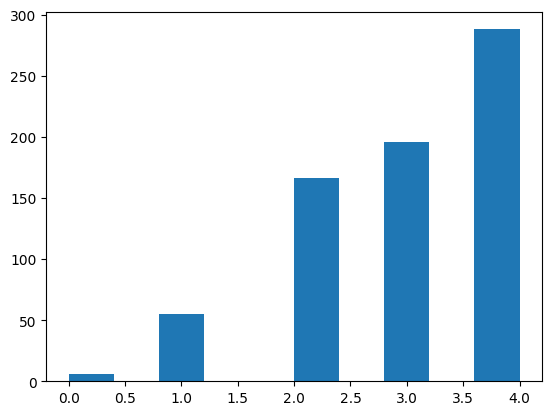

In [41]:
plt.hist(df_incomeScore['incomeScore'],bins=10)

[1, 2, 3, 4]
[0.0, 4.223375075693099, 8.326478084715706, 10.0]
y1_error: 0.47
y2_error: 0.07
y3_error: 0.00
 


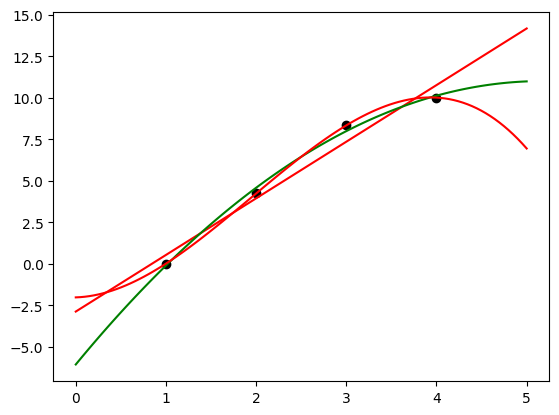

In [42]:
trend_details = ext.chk_trend(company['NFLX']['income']['totalRevenue'])
ext.show_trend(trend_details)

In [43]:

ticker = 'FIVE'
company[ticker]['incomeScore'] = scoreIncome(company[ticker]['inc_trend'],company_inc_median[ticker])
company[ticker]['incomeScore']

{'score': 4,
 'scoreBreakdown': {'totalRevenue': 4,
  'grossProfit': 4,
  'operatingIncome': 4,
  'netIncome': 4,
  'dilutedEPS': 4}}

In [44]:
ticker = 'FIVE'
company[ticker]['income'] 

company       yahoo_sector             gics_sector          industry  \
3378    FIVE  Consumer Cyclical  Consumer Discretionary  Specialty Retail   
3379    FIVE  Consumer Cyclical  Consumer Discretionary  Specialty Retail   
3380    FIVE  Consumer Cyclical  Consumer Discretionary  Specialty Retail   
3381    FIVE  Consumer Cyclical  Consumer Discretionary  Specialty Retail   

         st_date st_YR st_Mnth  totalRevenue  costOfRevenue   grossProfit  \
3378  2020-01-31  2020      01 1846730000.00  1172764000.00  673966000.00   
3379  2021-01-31  2021      01 1962137000.00  1309807000.00  652330000.00   
3380  2022-01-31  2022      01 2848354000.00  1817910000.00 1030444000.00   
3381  2023-01-31  2023      01 3076308000.00  1980817000.00 1095491000.00   

        netIncome  operatingIncome  netIncomeContinuousOperations  \
3378 175056000.00     217284000.00                   175056000.00   
3379 123361000.00     154803000.00                   123361000.00   
3380 278810000.00     379880000.00                   278810000.00   
3381 261528000.00     345043000.00                   261528000.00   

      netInterestIncome  interestIncome  otherIncomeExpense  operatingExpense  \
3378         4285000.00      4285000.00                0.00      456682000.00   
3379        -1736000.00            0.00                0.00      497527000.00   
3380       -13177000.00            0.00                0.00      650564000.00   
3381         2491000.00            0.00                0.00      750448000.00   

      totalExpenses  taxProvision  interestExpense          SGA  \
3378  1629446000.00   46513000.00             0.00 456682000.00   
3379  1807334000.00   29706000.00       1736000.00 497527000.00   
3380  2468474000.00   87893000.00      13177000.00 650564000.00   
3381  2731265000.00   86006000.00             0.00 750448000.00   

      researchAndDevelopment         ebit  dilutedEPS  basicEPS  
3378                    0.00 217284000.00        3.12      3.14  
3379                    0.00 154803000.00        2.20      2.21  
3380                    0.00 379880000.00        4.95      4.98  
3381                    0.00 345043000.00        4.69      4.71

[1, 2, 3, 4]
[3.345454545454545, 0.0, 10.0, 9.054545454545455]
y1_error: 7.74
y2_error: 7.38
y3_error: 0.00
 


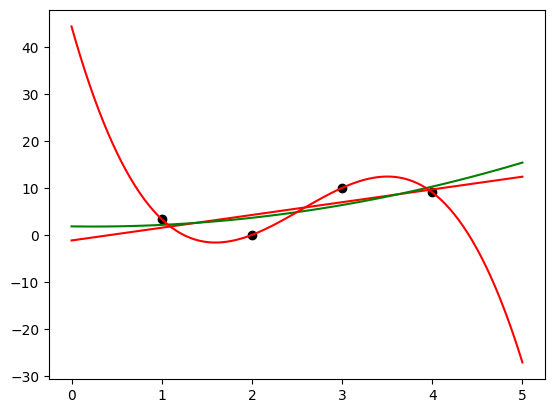

In [45]:
trend_details = ext.chk_trend(company[ticker]['income']['dilutedEPS'])
ext.show_trend(trend_details)

In [46]:
ticker = 'UBER'
company[ticker]['incomeScore']

{'score': 1,
 'scoreBreakdown': {'totalRevenue': 4,
  'grossProfit': 4,
  'operatingIncome': 0,
  'netIncome': 1,
  'dilutedEPS': 0}}

In [47]:
ticker = 'UBER'
company[ticker]['income'] 

company yahoo_sector  gics_sector              industry     st_date  \
2314    UBER   Technology  Industrials  Software—Application  2019-12-31   
2315    UBER   Technology  Industrials  Software—Application  2020-12-31   
2316    UBER   Technology  Industrials  Software—Application  2021-12-31   
2317    UBER   Technology  Industrials  Software—Application  2022-12-31   

     st_YR st_Mnth   totalRevenue  costOfRevenue    grossProfit  \
2314  2019      12 14147000000.00  7208000000.00  6939000000.00   
2315  2020      12 11139000000.00  5154000000.00  5985000000.00   
2316  2021      12 17455000000.00  9351000000.00  8104000000.00   
2317  2022      12 31877000000.00 19659000000.00 12218000000.00   

          netIncome  operatingIncome  netIncomeContinuousOperations  \
2314 -8506000000.00   -8596000000.00                 -8512000000.00   
2315 -6768000000.00   -4863000000.00                 -6788000000.00   
2316  -496000000.00   -3834000000.00                  -570000000.00   
2317 -9141000000.00   -1832000000.00                 -9138000000.00   

      netInterestIncome  interestIncome  otherIncomeExpense  operatingExpense  \
2314      -325000000.00    234000000.00        488000000.00    15535000000.00   
2315      -403000000.00     55000000.00      -1680000000.00    10848000000.00   
2316      -446000000.00     37000000.00       3255000000.00    11938000000.00   
2317      -426000000.00    139000000.00      -7168000000.00    14050000000.00   

      totalExpenses  taxProvision  interestExpense           SGA  \
2314 22743000000.00   45000000.00     559000000.00 7925000000.00   
2315 16002000000.00 -192000000.00     458000000.00 6249000000.00   
2316 21289000000.00 -492000000.00     483000000.00 7105000000.00   
2317 33709000000.00 -181000000.00     565000000.00 7892000000.00   

      researchAndDevelopment           ebit  dilutedEPS  basicEPS  
2314           4836000000.00 -7874000000.00       -6.81     -6.81  
2315           2205000000.00 -6488000000.00       -3.86     -3.86  
2316           2054000000.00  -542000000.00       -0.29     -0.26  
2317           2798000000.00 -8861000000.00       -4.65     -4.64

[1, 2, 3, 4]
[0.0, 4.524539877300612, 9.999999999999998, 3.31288343558282]
y1_error: 10.01
y2_error: 2.15
y3_error: 0.00
 


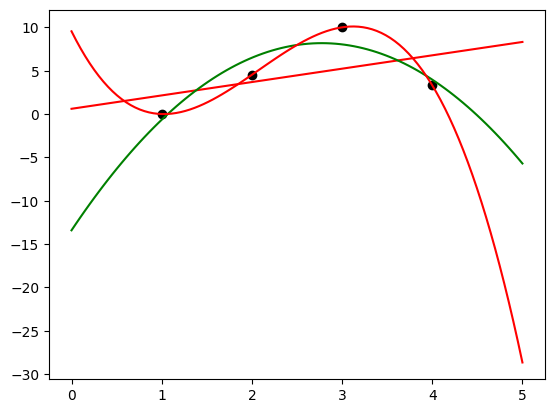

In [48]:
ticker = 'UBER'
trend_details = ext.chk_trend(company[ticker]['income']['dilutedEPS'])
ext.show_trend(trend_details)

## Score Balance Sheet

0 - Poor, 4 - Excellent

If stockholders equity is negative then the company's liabilities exceed its assets so it is has limited intrinsic
value. Apply a threshold so that we downgrade companies with negligible net asset value.



In [49]:
def scoreBalance(balanceTrend, balanceMedian,industry):

  equityThreshold = 100000000
  cashThreshold = 10000000
  debtCapitalThreshold = 90
  debtAssetThreshold = 90

  s1 = {}

  # Stockholders Equity
    
  # If stockholders equity is below threshold then treat net asset value as negligible 
  # and score as 0. Otherwise consider trend to determine score.

  feature = 'stockholdersEquity'

  if balanceMedian[feature] < equityThreshold:
    s1[feature] = 0
  else:
    if balanceTrend[feature] < -2:
      s1[feature] = 1
    elif balanceTrend[feature] < 0:
      s1[feature] = 2
    elif balanceTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Retained Profits

  # Positive and high retained profits is a sign of strength but a number of factors can influence whether this
  # is a good thing. Negative retained profits is bad as it signals losses in previous years and perhaps dividend
  # payouts not funded from earnings. 
    
  # Consider positive retained profit as ok and apply max score. For negative, set score to 0 and upgrade score 
  # if there is a positive trend.
    
  feature = 'retainedEarnings'

  if balanceMedian[feature] < 0:
    
    # Set score to 0 and upgrade if trend is positive
    
    s1[feature] = 0
  
    if balanceTrend[feature] > 2:
      s1[feature] = 2
    elif balanceTrend[feature] > 0:
      s1[feature] = 1
  else:
    # If retained profits is positive, set score to max
    
    s1[feature] = 4

  # Cash Assets

  # One would expect all companies to hold a minimum of cash to cover short term liabilities so any below
  # specified threshold should be scored 0. Any above threshold should be scored according to trend. 

  # A positive trend (>0) is reassuring while a declining trend may raise concerns even if historical cash 
  # positions have been good).

  feature = 'cashEquivalent'

  if balanceMedian[feature] < cashThreshold:
    s1[feature] = 0
  else:
    if balanceTrend[feature] < -2:
      s1[feature] = 1
    elif balanceTrend[feature] < 0:
      s1[feature] = 2
    elif balanceTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Working Capital

  # Various factors such as accounts receivables and inventory can affect this figure from one period to another. 
  # Also a positive trend is not necessarily a good thing as it may indicate in increase in inventory and goods 
  # not sold as quickly. 
    
  # So let's concern ourselves only where negative working capital. Where this is the case, a negative trend 
  # indicates a worsening gap between current assets and liabilities while a positive trend indicates an 
  # improvement.

  # A negative working capital depends on industry and with a strong positive trend, should not by itself be a 
  # reason for not buying the stock. If other indicators are week then this will drive the overall score down 
  # anyway.

  feature = 'workingCapital'
    
  if balanceMedian[feature] < 0:
    if balanceTrend[feature] < -2:
      s1[feature] = 0
    elif balanceTrend[feature] < 0:
      s1[feature] = 1
    elif balanceTrend[feature] < 2:
      s1[feature] = 2
    else:
      s1[feature] = 3
  else:
    # Set score to max if working capital is positive
    s1[feature] = 4
    
  # Quick Ratio
  
  # Determines how strong the company is in paying off short term liabilities using cash assets. 

  # Quick ratios vary according to industry with retail having very low values. We need to take care not to 
  # exclude companies belonging to certain sectors while balancing risk. 
    
  feature = 'quickRatio'
    
  if balanceMedian[feature] < 0.2:
    s1[feature] = 0
  elif balanceMedian[feature] < 0.5:
    s1[feature] = 1
  elif balanceMedian[feature] < 1.0:
    s1[feature] = 2
  elif balanceMedian[feature] < 1.5:
    s1[feature] = 3
  else:
    s1[feature] = 4

  # Quick ratio is low for some industries such as retail. Ignore declining trends as it tends to cause 
  # distortions to the overall score. However consider positive trends to improve score unless the score is 0.

  if s1[feature] > 0:
    
    if balanceTrend[feature] >  2:
      # Steeep incline
      s1[feature] = min(s1[feature] + 2,4)
    elif balanceTrend[feature] >  0:
      # Gentle incline
      s1[feature] = min(s1[feature] + 1,4)
  
  # Current Ratio

  feature = 'currentRatio'
    
  if balanceMedian[feature] < 0.5:
    s1[feature] = 0
  elif balanceMedian[feature] < 1:
    s1[feature] = 1
  elif balanceMedian[feature] < 2:
    s1[feature] = 2
  elif balanceMedian[feature] < 3:
    s1[feature] = 3
  else:
    s1[feature] = 4

  # Upgrade score if there is a positive trend and the score is not 0.
  # The intuition is that unless it is really bad (score of 0), take into consideration improving trend.
    
  if s1[feature] > 0:
    
    if balanceTrend[feature] >  2:
      # Steeep incline
      s1[feature] = min(s1[feature] + 2,4)
    elif balanceTrend[feature] >  0:
      # Gentle incline
      s1[feature] = min(s1[feature] + 1,4)
 
  # Solvency Rato - Debt to Capital Ratio

  # Indication of level of leverage. Consider industry norm plus max threshold of 75%.
    
  # If stockholder equity is below threshold then set a default score of 0 as it is meaningless to calculate 
  # a ratio where equity is negligible or even negative.
    
  # Set score to 0 if leverage is > 80%
  
  feature = 'debtCapitalRatio'

  if balanceMedian['stockholdersEquity'] < equityThreshold:
    s1[feature] = 0
  elif balanceMedian[feature] > debtCapitalThreshold:
    s1[feature] = 0 
  elif balanceMedian[feature] > 80:
    s1[feature] = 1
  elif balanceMedian[feature] > 70:
     s1[feature] = 2
  elif balanceMedian[feature] > 60:
     s1[feature] = 3
  else:
     s1[feature] = 4
    
  # Now consider trend

  # If the score is 4 then we have deemed the ratio to be really good and if it is 0 then bad. For any score
  # in between, consider trend as a signs of improvment or decline. 
    
  # The balance we are looking to achieve here is the trade off between risk associated with high leverage and 
  # trend which signals improvement or decline.

  if (s1[feature] > 0)  & (s1[feature] < 4):

    if balanceTrend[feature] < -2:
      # Steep decline
      s1[feature] = min(s1[feature] + 2,4)
    elif balanceTrend[feature] < 0.01:
      # Gentle decline
      s1[feature] = min(s1[feature] + 1,4)
    elif balanceTrend[feature] < 2:
      # Gentle incline
      s1[feature] = max(s1[feature] - 1,0)
    else:
      # Steep incline
      s1[feature] = max(s1[feature] - 2,0)

  
  # Solvency - Debt to Asset Ratio

  # Given that shareholder equity is negative or small in many cases, it makes sense to consider debt to asset
  # ratio as well to assess levels of debt relative to assets. 

  # Also we want to create a bias against companies with high levels of debt so considering both scores will help
  # this. 

  # If ratio is above threshold then set score to 0.

  feature = 'debtAssetRatio'

  if balanceMedian[feature] > debtAssetThreshold:
    s1[feature] = 0 
  elif balanceMedian[feature] > 70:
    s1[feature] = 1
  elif balanceMedian[feature] > 50:
     s1[feature] = 2
  elif balanceMedian[feature] > 30:
     s1[feature] = 3
  else:
     s1[feature] = 4
  
  # Now consider trend
  
  # If the score is 4 then we have deemed the ratio to be really good and if it is 0 then bad. For any score
  # in between, consider trend as a signs of improvment or decline. 
    
  # The balance we are looking to achieve here is the trade off between risk associated with high leverage and 
  # trend which signals improvement or decline. Ignore trend if score is 0 (high levels of debt or 4 very low
  # levels of debt.)

  if (s1[feature] > 0)  & (s1[feature] < 4):

    if balanceTrend[feature] < -2:
      # Steep decline
      s1[feature] = min(s1[feature] + 2,4)
    elif balanceTrend[feature] < 0.01:
      # Gentle decline
      s1[feature] = min(s1[feature] + 1,4)
    elif balanceTrend[feature] < 2:
      # Gentle incline
      s1[feature] = max(s1[feature] - 1,0)
    else:
      # Steep incline
      s1[feature] = max(s1[feature] - 2,0)

  # Scoring

  # Determine mean score. If any of the scores are 0 then apply a ceiling of 2.
  
  l_scores = list(s1.values())
    
  meanScore = int(np.mean(l_scores))

  if min(l_scores) == 0:
    if meanScore > 2:
      meanScore = 2

  score = {'score': meanScore,
           'scoreBreakdown': s1}

  return score

In [50]:
ticker = 'RIVN'

company[ticker]['balanceScore'] = scoreBalance(company[ticker]['bal_trend'],
                                                 company[ticker]['bal_median'],
                                                 company[ticker]['industry'])  
company[ticker]['balanceScore'] 

{'score': 2,
 'scoreBreakdown': {'stockholdersEquity': 4,
  'retainedEarnings': 0,
  'cashEquivalent': 4,
  'workingCapital': 4,
  'quickRatio': 4,
  'currentRatio': 4,
  'debtCapitalRatio': 4,
  'debtAssetRatio': 4}}

In [51]:
company[ticker]['balanceScore'] 

{'score': 2,
 'scoreBreakdown': {'stockholdersEquity': 4,
  'retainedEarnings': 0,
  'cashEquivalent': 4,
  'workingCapital': 4,
  'quickRatio': 4,
  'currentRatio': 4,
  'debtCapitalRatio': 4,
  'debtAssetRatio': 4}}

In [52]:
company[ticker]['balance'] 

company       yahoo_sector             gics_sector            industry  \
2785    RIVN  Consumer Cyclical  Consumer Discretionary  Auto Manufacturers   
2786    RIVN  Consumer Cyclical  Consumer Discretionary  Auto Manufacturers   
2783    RIVN  Consumer Cyclical  Consumer Discretionary  Auto Manufacturers   
2784    RIVN  Consumer Cyclical  Consumer Discretionary  Auto Manufacturers   

         st_date st_YR st_Mnth  cashEquivalent  receivables  finishedGoods  \
2785  2019-12-31  2019      12   2264000000.00         0.00           0.00   
2786  2020-12-31  2020      12   2979000000.00         0.00           0.00   
2783  2021-12-31  2021      12  18133000000.00  26000000.00           0.00   
2784  2022-12-31  2022      12  11568000000.00 102000000.00   399000000.00   

      workInProcess  rawMaterials  otherCurrentAssets     inventory  \
2785           0.00          0.00         29000000.00          0.00   
2786           0.00          0.00         37000000.00          0.00   
2783           0.00          0.00        126000000.00  274000000.00   
2784           0.00  949000000.00        112000000.00 1348000000.00   

      currentAssets        netPPE  otherNonCurrentAssets  financialAssets  \
2785  2293000000.00  313000000.00            27000000.00             0.00   
2786  3016000000.00 1525000000.00            61000000.00             0.00   
2783 18559000000.00 3411000000.00           324000000.00             0.00   
2784 13130000000.00 4088000000.00           658000000.00             0.00   

      goodwill  goodwillAndOtherIntangibleAssets  otherIntangibleAssets  \
2785      0.00                              0.00                   0.00   
2786      0.00                              0.00                   0.00   
2783      0.00                              0.00                   0.00   
2784      0.00                              0.00                   0.00   

      nonCurrentAccountsReceivable  totalNonCurrentAssets  currentDebt  \
2785                          0.00           340000000.00   3000000.00   
2786                          0.00          1586000000.00  50000000.00   
2783                          0.00          3735000000.00  89000000.00   
2784                          0.00          4746000000.00 270000000.00   

      payablesAndAccruedExpenses  otherCurrentLiabilities  currentLiabilities  \
2785                164000000.00               3000000.00        185000000.00   
2786                533000000.00              22000000.00        611000000.00   
2783               1150000000.00                     0.00       1313000000.00   
2784               2154000000.00                     0.00       2424000000.00   

      longTermDebt  otherNonCurrentLiabilities  nonCurrentDeferredLiabilities  \
2785   71000000.00                  2000000.00                           0.00   
2786  130000000.00                  1000000.00                           0.00   
2783 1444000000.00                 23000000.00                           0.00   
2784 1542000000.00                111000000.00                           0.00   

      nonCurrentDeferredTaxesLiabilities  longTermProvisions  \
2785                                0.00                0.00   
2786                                0.00                0.00   
2783                                0.00                0.00   
2784                                0.00                0.00   

      totalNonCurrentLiabilities  retainedEarnings  stockholdersEquity  \
2785               2823000000.00     -668000000.00       -375000000.00   
2786               5375000000.00    -1686000000.00      -1384000000.00   
2783               1467000000.00    -6374000000.00      19514000000.00   
2784               1653000000.00   -13126000000.00      13799000000.00   

         totalDebt    totalAssets  totalLiabilities  workingCapital  \
2785   74000000.00  2633000000.00     3008000000.00   2108000000.00   
2786  180000000.00  4602000000.00     5986000000.00   2405000000.00   
2783 1533000

In [53]:
l_score = []

for ticker in company:
    
  print(ticker)
  company[ticker]['balanceScore'] = scoreBalance(company[ticker]['bal_trend'],
                                                 company[ticker]['bal_median'],
                                                 company[ticker]['industry'])  
 
  S = pd.Series({'company': ticker,
                 'industry': company[ticker]['industry'],
                 'balanceScore': company[ticker]['balanceScore']['score'],
                 'stockholdersEquity': company[ticker]['balanceScore']['scoreBreakdown']['stockholdersEquity'],
                 'retainedEarnings': company[ticker]['balanceScore']['scoreBreakdown']['retainedEarnings'],
                 'cashEquivalent': company[ticker]['balanceScore']['scoreBreakdown']['cashEquivalent'],
                 'workingCapital': company[ticker]['balanceScore']['scoreBreakdown']['workingCapital'],
                 'currentRatio': company[ticker]['balanceScore']['scoreBreakdown']['currentRatio'],
                 'debtAssetRatio': company[ticker]['balanceScore']['scoreBreakdown']['debtAssetRatio']})
                  
  l_score.append(S)

df_balanceScore = pd.DataFrame(l_score)

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


In [54]:
mask=df_balanceScore['balanceScore'] == 3
df_balanceScore[mask].sort_values(by='industry')

company                                industry  balanceScore  \
465     OMC                    Advertising Agencies             3   
437     NOC                     Aerospace & Defense             3   
693     WWD                     Aerospace & Defense             3   
281     HEI                     Aerospace & Defense             3   
283     HII                     Aerospace & Defense             3   
248      GD                     Aerospace & Defense             3   
98     BWXT                     Aerospace & Defense             3   
546     RTX                     Aerospace & Defense             3   
298     HXL                     Aerospace & Defense             3   
361     LMT                     Aerospace & Defense             3   
158      CW                     Aerospace & Defense             3   
405    MRCY                     Aerospace & Defense             3   
401     MOS                     Agricultural Inputs             3   
155    CTVA                     Agricultural Inputs             3   
239     FMC                     Agricultural Inputs             3   
372     LUV                                Airlines             3   
141     CPA                                Airlines             3   
1        AA                                Aluminum             3   
136    COLM                   Apparel Manufacturing             3   
514     PVH                   Apparel Manufacturing             3   
96     BURL                          Apparel Retail             3   
606     TJX                          Apparel Retail             3   
145     CRI                          Apparel Retail             3   
540    ROST                          Apparel Retail             3   
370    LULU                          Apparel Retail             3   
472     PAG                Auto & Truck Dealerships             3   
186    DRVN                Auto & Truck Dealerships             3   
346     LAD                Auto & Truck Dealerships             3   
226       F                      Auto Manufacturers             3   
623    TSLA                      Auto Manufacturers             3   
97      BWA                              Auto Parts             3   
359     LKQ                              Auto Parts             3   
349     LEA                              Auto Parts             3   
262    GNTX                              Auto Parts             3   
50     APTV                              Auto Parts             3   
594     TAP                       Beverages—Brewers             3   
344      KO                 Beverages—Non-Alcoholic             3   
407    MRNA                           Biotechnology             3   
222    EXEL                           Biotechnology             3   
309    INCY                           Biotechnology             3   
326    JAZZ                           Biotechnology             3   
90     BMRN                           Biotechnology             3   
541    RPRX                           Biotechnology             3   
223     EXP                      Building Materials             3   
652     VMC                      Building Materials             3   
397     MLM                      Building Materials             3   
62      AWI           Building Products & Equipment             3   
151     CSL           Building Products & Equipment             3   
89     BLDR           Building Products & Equipment             3   
68     AZEK           Building Products & Equipment             3   
617    TREX           Building Products & Equipment             3   
229    FBIN           Building Products & Equipment             3   
455      OC           Building Products & Equipment             3   
625      TT           Building Products & Equipment             3   
366     LPX           Building Products & Equipment             3   
103    CARR           Building Products & Equipment             3   
682     WMS           Building Products & Equipment             3   
64

(array([ 10.,   0.,  62.,   0.,   0., 219.,   0., 358.,   0.,  62.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

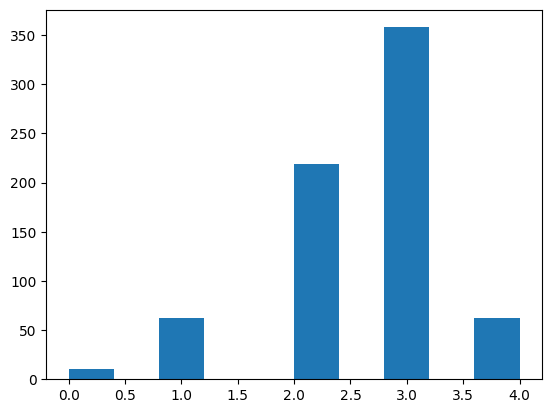

In [55]:
pd.options.display.float_format = '{:.2f}'.format
plt.hist(df_balanceScore['balanceScore'],bins=10)

In [57]:
df_balanceScore.sort_values(by='balanceScore')

company                                industry  balanceScore  \
56     ATUS                        Telecom Services             0   
121    CHTR                        Telecom Services             0   
251     GEN                 Software—Infrastructure             0   
249    GDDY                 Software—Infrastructure             0   
414    MSGS                           Entertainment             0   
217     EVA                Lumber & Wood Production             0   
102     CAR               Rental & Leasing Services             0   
562     SIX                                 Leisure             0   
618    TRGP                     Oil & Gas Midstream             0   
552    SBUX                             Restaurants             0   
424    NCLH                         Travel Services             1   
284     HLT                                 Lodging             1   
643     UNP                               Railroads             1   
289     HPQ                       Computer Hardware             1   
500      PM                                 Tobacco             1   
192     DVA                 Medical Care Facilities             1   
333     JWN                       Department Stores             1   
657    VRSN                 Software—Infrastructure             1   
641      UI                 Communication Equipment             1   
666       W                         Internet Retail             1   
75     BBWI                        Specialty Retail             1   
481    PDCE                           Oil & Gas E&P             1   
69      AZO                        Specialty Retail             1   
67      AYX                    Software—Application             1   
478     PCG            Utilities—Regulated Electric             1   
473    PANW                 Software—Infrastructure             1   
353    LESL                        Specialty Retail             1   
470     OVV                           Oil & Gas E&P             1   
656    VRSK                     Consulting Services             1   
278     HCA                 Medical Care Facilities             1   
526     RCL                         Travel Services             1   
277     HBI                   Apparel Manufacturing             1   
188     DTE            Utilities—Regulated Electric             1   
185     DPZ                             Restaurants             1   
593       T                        Telecom Services             1   
575    SPLK                 Software—Infrastructure             1   
596     TDG                     Aerospace & Defense             1   
599    TEAM                    Software—Application             1   
171      DG                         Discount Stores             1   
164     DBX                 Software—Infrastructure             1   
161     DAL                                Airlines             1   
225    EXPE                         Travel Services             1   
159     CZR                       Resorts & Casinos             1   
560    SIRI                           Entertainment             1   
156    CVNA                Auto & Truck Dealerships             1   
559     SHW                     Specialty Chemicals             1   
609    TMUS                        Telecom Services             1   
140    COTY           Household & Personal Products             1   
542     RRC                           Oil & Gas E&P             1   
535     RNG                    Software—Application             1   
469    OTIS          Specialty Industrial Machinery             1   
117    CHDN                                Gambling             1   
678     WIX                 Software—Infrastructure             1   
95      BSY                    Software—Application             1   
6       ABC                    Medical Distribution             1   
35      AMC                           Entertainment             1   
703     YUM                             Restaurants             1   
44

Let's take a closer look at Starbucks as it scores badly

In [58]:
company['SBUX']['balanceScore']

{'score': 0,
 'scoreBreakdown': {'stockholdersEquity': 0,
  'retainedEarnings': 0,
  'cashEquivalent': 3,
  'workingCapital': 1,
  'quickRatio': 2,
  'currentRatio': 1,
  'debtCapitalRatio': 0,
  'debtAssetRatio': 0}}

In [59]:
company['SBUX']['balance']

company       yahoo_sector             gics_sector     industry  \
2807    SBUX  Consumer Cyclical  Consumer Discretionary  Restaurants   
2808    SBUX  Consumer Cyclical  Consumer Discretionary  Restaurants   
2809    SBUX  Consumer Cyclical  Consumer Discretionary  Restaurants   
2810    SBUX  Consumer Cyclical  Consumer Discretionary  Restaurants   

         st_date st_YR st_Mnth  cashEquivalent   receivables  finishedGoods  \
2807  2019-09-30  2019      09   2757100000.00  879200000.00   564500000.00   
2808  2020-09-30  2020      09   4632100000.00  883400000.00   517400000.00   
2809  2021-09-30  2021      09   6617900000.00  940000000.00   562800000.00   
2810  2022-09-30  2022      09   3182900000.00 1175500000.00   741200000.00   

      workInProcess  rawMaterials  otherCurrentAssets     inventory  \
2807           0.00  964900000.00                0.00 1529400000.00   
2808           0.00 1034000000.00                0.00 1551400000.00   
2809           0.00 1041100000.00                0.00 1603900000.00   
2810           0.00 1435400000.00                0.00 2176600000.00   

      currentAssets         netPPE  otherNonCurrentAssets  financialAssets  \
2807  5653900000.00  6431700000.00           479600000.00             0.00   
2808  7806400000.00 14375500000.00           568600000.00             0.00   
2809  9756400000.00 14605500000.00           578500000.00             0.00   
2810  7018700000.00 14576100000.00           554200000.00             0.00   

          goodwill  goodwillAndOtherIntangibleAssets  otherIntangibleAssets  \
2807 3490800000.00                     4272600000.00           781800000.00   
2808 3597200000.00                     4149300000.00           552100000.00   
2809 3677300000.00                     4027200000.00           349900000.00   
2810 3283500000.00                     3439400000.00           155900000.00   

      nonCurrentAccountsReceivable  totalNonCurrentAssets   currentDebt  \
2807                          0.00         13565700000.00          0.00   
2808                          0.00         21568100000.00 2937500000.00   
2809                          0.00         21636200000.00 2250200000.00   
2810                          0.00         20959700000.00 3169700000.00   

      payablesAndAccruedExpenses  otherCurrentLiabilities  currentLiabilities  \
2807               4689200000.00                     0.00       6168700000.00   
2808               2952800000.00                     0.00       7346800000.00   
2809               4305100000.00                     0.00       8151400000.00   
2810               4340200000.00                     0.00       9151800000.00   

       longTermDebt  otherNonCurrentLiabilities  \
2807 11167000000.00               1370500000.00   
2808 22321300000.00                907300000.00   
2809 21354900000.00                737800000.00   
2810 20635100000.00                610500000.00   

      nonCurrentDeferredLiabilities  nonCurrentDeferredTaxesLiabilities  \
2807                  6744400000.00                                0.00   
2808                  6598500000.00                                0.00   
2809                  6463000000.00                                0.00   
2810                  6279700000.00                                0.00   

      longTermProvisions  totalNonCurrentLiabilities  retainedEarnings  \
2807                0.00              19281900000.00    -5771200000.00   
2808                0.00              29827100000.00    -7815600000.00   
2809                0.00              28555700000.00    -6315700000.00   
2810                0.00              27525300000.00    -8449800000.00   

      stockholdersEquity      totalDebt    totalAssets  totalLiabilities  \
2807      -6232200000.00 11167000000.00 19219600000.00    25450600000.00   
2808      -7805100000.00 25258800000.00 29374500000.00    37173900000.00   
2809      -5321200000.00 23605100000.00 31392600000.00    36707100000.00   
2810      -87066

Note negative stockholders equity and retainedEarnings. Also high level of debt.

In [60]:
company['SBUX']['bal_median']['workingCapital']

-27600000.0

-27600000.0
[1, 2, 3, 4]
[4.329204676172386, 6.935876514806987, 10.0, 0.0]
y1_error: 12.22
y2_error: 2.29
y3_error: 0.00
 


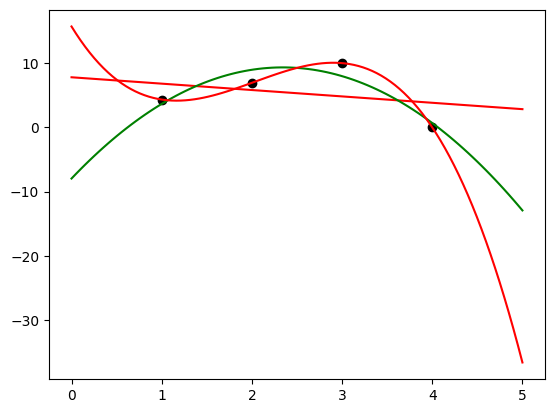

In [61]:
feature='workingCapital'
ticker = 'SBUX'
print(company[ticker]['bal_median'][feature])
trend_details = ext.chk_trend(company[ticker]['balance'][feature])
ext.show_trend(trend_details)

2593850000.0
[1, 2, 3, 4]
[0.0, 9.26743855885415, 7.099094551534845, 10.0]
y1_error: 5.94
y2_error: 3.41
y3_error: 0.00
 


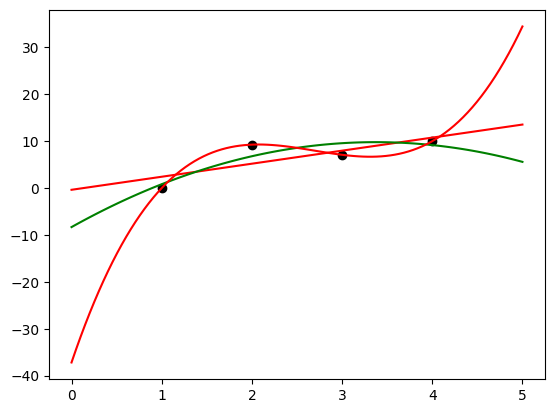

In [62]:
feature='currentDebt'
ticker = 'SBUX'
print(company[ticker]['bal_median'][feature])
trend_details = ext.chk_trend(company[ticker]['balance'][feature])
ext.show_trend(trend_details)

5863000000.0
[1, 2, 3, 4]
[0.9279086366880795, 10.0, 1.5227218653342844, 0.0]
y1_error: 14.52
y2_error: 7.51
y3_error: 0.00
 


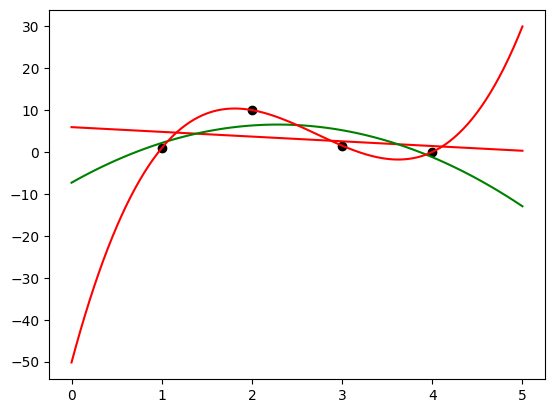

In [63]:
feature='cashEquivalent'
ticker = 'PEP'
print(company[ticker]['bal_median'][feature])
trend_details = ext.chk_trend(company[ticker]['balance'][feature])
ext.show_trend(trend_details)

In [64]:
company['SBUX']['bal_trend']

{'cashEquivalent': 1,
 'receivables': 3,
 'inventory': 3,
 'currentAssets': 1,
 'netPPE': 3,
 'goodwill': -1,
 'totalNonCurrentAssets': 3,
 'currentDebt': 3,
 'payablesAndAccruedExpenses': 0,
 'otherCurrentLiabilities': 0,
 'currentLiabilities': 3,
 'longTermDebt': 2,
 'totalNonCurrentLiabilities': 2,
 'retainedEarnings': -2,
 'stockholdersEquity': -1,
 'totalDebt': 3,
 'totalAssets': 2,
 'totalLiabilities': 3,
 'workingCapital': -1,
 'debtCapitalRatio': -2,
 'debtAssetRatio': 3,
 'quickRatio': -1,
 'currentRatio': -1}

In [65]:
company['GOOG']['balanceScore']

{'score': 3,
 'scoreBreakdown': {'stockholdersEquity': 4,
  'retainedEarnings': 4,
  'cashEquivalent': 2,
  'workingCapital': 4,
  'quickRatio': 4,
  'currentRatio': 4,
  'debtCapitalRatio': 4,
  'debtAssetRatio': 4}}

128184500000.0
[1, 2, 3, 4]
[2.284158071618956, 8.858500405608991, 9.999999999999991, 0.0]
y1_error: 17.58
y2_error: 0.41
y3_error: 0.00
 


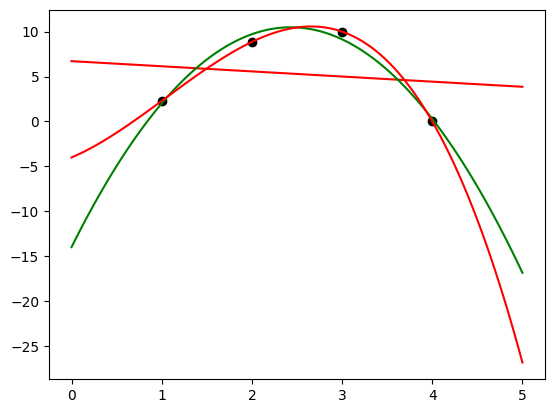

In [66]:
feature='cashEquivalent'
ticker = 'GOOG'
print(company[ticker]['bal_median'][feature])
trend_details = ext.chk_trend(company[ticker]['balance'][feature])
ext.show_trend(trend_details)

## Score Cash Sheet

0 - Poor
4 - Excellent

Free cashflow should be positive.

Determine what percentage of free cash flow is spent on capital expenditure.

Is stock buy backs and dividends coverned by free cashflow.

How is money spent:
    
    Dividends, stock buy backs acquisitions, investment in own company
    
How is finance raised:
    
    Stock issuance, debt issuance, asset sales
    
May be an idea to just concentrate on free cash flow and related trend, cover for spend on share buy backs,
dividends and capex.


In [78]:
def scoreCash(cashTrend, cashMedian,industry):

  T_operatingCashFlow = 10000000
  T_freeCashFlow = 10000000

  s1={}

  # Operating CashFlow
    
  # This is the amount of cash generated by company and is available to spend. 

  feature='cashFlowOperatingActivities'
    
  if cashMedian[feature] < T_operatingCashFlow:
    s1[feature] = 0
  else:
    if cashTrend[feature] < -2:
      s1[feature] = 1
    elif cashTrend[feature] < 0:
      s1[feature] = 2
    elif cashTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Free Cashflow

  # Amount of cash left after allowing for capital expenditure. This is essentially spare cash which the company
  # can use to pay dividends, buy back stock, makes investments etc.
    
  feature='freeCashFlow'
    
  if cashMedian[feature] < T_freeCashFlow:
    s1[feature] = 0
  else:
    if cashTrend[feature] < -2:
      s1[feature] = 1
    elif cashTrend[feature] < 0:
      s1[feature] = 2
    elif cashTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
 
  # Is the money spent on dividends and stock buy backs covered by free cash flow generated?

  # If ratio > 1 then it means that dividends paid plus stock buy backs exceed free cash flow.
  # Also allow for free cashflow being negative.
    
  feature = 'dividendCover'
  ratio = (cashMedian['cashDividendsPaid'] + cashMedian['repurchaseOfCapitalStock']) / cashMedian['freeCashFlow']
  
  if ratio > 1 or cashMedian['freeCashFlow'] < 0:
    # Dividend payments and stock repurchases not fully covered by free cash flow
    s1[feature] = 0
  elif ratio > 0.80:
    # Amount of free cash flow distributed is high, question whether this is sustainable
    s1[feature] = 1
  elif ratio > 0.60:
    s1[feature] = 2
  elif ratio > 0.40:
    s1[feature] = 3
  else:
    s1[feature] = 4
 
  # Check trend for Dividend payments and stock buybacks

  feature = 'commonStockDividendPaid'
    
  if cashMedian[feature] == 0:
    # Stock does not pay dividends. Not a negative so set score to 2.
    temp_div_score = 2
  else:
    if cashTrend[feature] < -2:
      temp_div_score = 1
    elif cashTrend[feature] < 0:
      temp_div_score = 2
    elif cashTrend[feature] < 2:
      temp_div_score = 3
    else:
      temp_div_score = 4  
   
  feature = 'repurchaseOfCapitalStock'
    
  if cashMedian[feature] == 0:
    # Stock does not pay dividends. Not a negative so set score to 2.
    temp_rep_score = 2
  else:
    if cashTrend[feature] < -2:
      temp_rep_score = 1
    elif cashTrend[feature] < 0:
      temp_rep_score = 2
    elif cashTrend[feature] < 2:
      temp_rep_score = 3
    else:
      temp_rep_score = 4  
  
  # Some companies have a tendency to pay dividends and increase them progressively in line 
  # with business performance. Others tend to buyback stock. Of there are those who do a combination 
  # of both. 
    
  # Take the score as the max of the score from stock buy back and dividends unless score for dividend cover
  # is 0. A 0 score for dividend cover indicates dividends exceed free cash flow generated over the period.

  if s1['dividendCover'] > 0:
    s1['stockDivBuyBack'] = max(temp_div_score,temp_rep_score)
  else:
    s1['stockDivBuyBack'] = 0
 
  # Scoring

  # Determine mean score. If any of the scores are 0 then apply a ceiling of 2.
 
  l_scores = list(s1.values())
    
  meanScore = int(np.mean(l_scores))
 
  if min(l_scores) == 0:
    if meanScore > 2:
      meanScore = 2

  score = {'score': meanScore,
           'scoreBreakdown': s1}

  return score

In [79]:
l_score = []

for ticker in company:
    
  print(ticker)
  company[ticker]['cashScore'] = scoreCash(company[ticker]['cash_trend'],
                                           company[ticker]['cash_median'],
                                           company[ticker]['industry'])  
 
  S = pd.Series({'company': ticker,
                 'industry': company[ticker]['industry'],
                 'cashScore': company[ticker]['cashScore']['score'],
                 'cashFlowOperatingActivities': company[ticker]['cashScore']['scoreBreakdown']['cashFlowOperatingActivities'],
                 'freeCashFlow': company[ticker]['cashScore']['scoreBreakdown']['freeCashFlow'],
                 'dividendCover': company[ticker]['cashScore']['scoreBreakdown']['dividendCover'],
                 'stockDivBuyBack': company[ticker]['cashScore']['scoreBreakdown']['stockDivBuyBack']})
                  
  l_score.append(S)

df_cashScore = pd.DataFrame(l_score)

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


In [80]:
df_cashScore.sort_values(by='cashScore').reset_index()

index company                                industry  cashScore  \
0       81      BG                           Farm Products          0   
1      133     CNP            Utilities—Regulated Electric          0   
2      678     WIX                 Software—Infrastructure          0   
3      192     DVA                 Medical Care Facilities          0   
4       83    BILL                    Software—Application          0   
5       82    BIIB              Drug Manufacturers—General          0   
6      638    UBER                    Software—Application          0   
7      364    LOPE           Education & Training Services          0   
8      436      NI                 Utilities—Regulated Gas          0   
9      232      FE            Utilities—Regulated Electric          0   
10     188     DTE            Utilities—Regulated Electric          0   
11     521      QS                              Auto Parts          0   
12     433     NFE                 Utilities—Regulated Gas          0   
13     440     NRG   Utilities—Independent Power Producers          0   
14     329    JBLU                                Airlines          0   
15      71      BA                     Aerospace & Defense          0   
16     240     FND                 Home Improvement Retail          0   
17     442    NTNX                 Software—Infrastructure          0   
18     443    NTRA                  Diagnostics & Research          0   
19     445    NVAX                           Biotechnology          0   
20     243    FRPT                          Packaged Foods          0   
21      63     AWK               Utilities—Regulated Water          0   
22     631    TWLO          Internet Content & Information          0   
23     526     RCL                         Travel Services          0   
24     684    WOLF                          Semiconductors          0   
25      73    BALL                  Packaging & Containers          0   
26      59     AVT     Electronics & Computer Distribution          0   
27     613    TOST                 Software—Infrastructure          0   
28     625      TT           Building Products & Equipment          0   
29     660    VSAT                 Communication Equipment          0   
30     416     MSM                 Industrial Distribution          0   
31     409    MRTX                           Biotechnology          0   
32     532    RIVN                      Auto Manufacturers          0   
33     114    CFLT                 Software—Infrastructure          0   
34     662     VST   Utilities—Independent Power Producers          0   
35     347   LBRDA                        Telecom Services          0   
36     111     CEG                     Utilities—Renewable          0   
37     560    SIRI                           Entertainment          0   
38     666       W                         Internet Retail          0   
39     106     CCL                         Travel Services          0   
40     431     NEU                     Specialty Chemicals          0   
41     105     CCK                  Packaging & Containers          0   
42     215     ETR            Utilities—Regulated Electric          0   
43     424    NCLH                         Travel Services          0   
44     425    NCNO                    Software—Application          0   
45     217     EVA                Lumber & Wood Production          0   
46     196    EBAY                         Internet Retail          0   
47     523    RARE                           Biotechnology          0   
48     428     NEE            Utilities—Regulated Electric          0   
49     674     WEC            Utilities—Regulated Electric          0   
50     563     SKX                  Footwear & Accessories          0   
51     220    EXAS                  Diagnostics & Research          0   
52     221     EXC            Utilities—Regulated Electric          0   
53     422    NATI                    Software—Application     

In [72]:
df_company_cash_median

company                                industry      netIncome  \
0         A                  Diagnostics & Research  1140500000.00   
1        AA                                Aluminum  -136000000.00   
2       AAL                                Airlines  -933000000.00   
3       AAP                        Specialty Retail   497446500.00   
4      AAPL                    Consumer Electronics 76045500000.00   
5      ABBV              Drug Manufacturers—General  9712000000.00   
6       ABC                    Medical Distribution  1197648500.00   
7      ABNB                         Travel Services  -513186500.00   
8       ABT                         Medical Devices  5714000000.00   
9      ACHC                 Medical Care Facilities   149779000.00   
10      ACI                          Grocery Stores  1181850000.00   
11      ACM              Engineering & Construction    -6592500.00   
12      ACN         Information Technology Services  5507324000.00   
13     ADBE                 Software—Infrastructure  4789000000.00   
14      ADI                          Semiconductors  1376716500.00   
15      ADM                           Farm Products  2240500000.00   
16      ADP          Staffing & Employment Services  2532500000.00   
17     ADSK                    Software—Application   660000000.00   
18      ADT          Security & Protection Services  -382500000.00   
19      AEE            Utilities—Regulated Electric   930500000.00   
20      AEP            Utilities—Regulated Electric  2253650000.00   
21      AES                   Utilities—Diversified  -181500000.00   
22     AFRM                 Software—Infrastructure  -275689000.00   
23     AGCO     Farm & Heavy Construction Machinery   658350000.00   
24      AGR            Utilities—Regulated Electric   703500000.00   
25     AKAM                 Software—Infrastructure   540363000.00   
26       AL               Rental & Leasing Services   476448000.00   
27      ALB                     Specialty Chemicals   454496000.00   
28     ALGN                         Medical Devices   607398000.00   
29      ALK                                Airlines   268000000.00   
30     ALLE          Security & Protection Services   429900000.00   
31     ALNY                           Biotechnology  -872198500.00   
32     ALSN                              Auto Parts   486500000.00   
33       AM                     Oil & Gas Midstream   -21950500.00   
34     AMAT     Semiconductor Equipment & Materials  4753500000.00   
35      AMC                           Entertainment -1121350000.00   
36     AMCR                  Packaging & Containers   708500000.00   
37      AMD                          Semiconductors  1905000000.00   
38      AME          Specialty Industrial Machinery   931246000.00   
39     AMED                 Medical Care Facilities   155220500.00   
40     AMGN              Drug Manufacturers—General  6908000000.00   
41     AMZN                         Internet Retail 16459500000.00   
42       AN                Auto & Truck Dealerships   911500000.00   
43     ANET                       Computer Hardware   850360500.00   
44     ANSS                    Software—Application   452961000.00   
45      AOS          Specialty Industrial Machinery   357450000.00   
46      APA                           Oil & Gas E&P -1190000000.00   
47      APD                     Specialty Chemicals  1992900000.00   
48      APH                   Electronic Components  1397100000.00   
49      APP                    Software—Application   -44870500.00   
50     APTV                              Auto Parts   792000000.00   
51     ARMK             Specialty Business Services    51825500.00   
52      ARW     Electronics & Computer Distribution   846317500.00   
53      ASH                     Specialty Chemicals   362500000.00   
54      ATO                 Utilities—Regulated Gas   633503000.00   
55      ATR          Medical Instruments & Supplies   240745000.00   
56     ATUS   

In [93]:
ticker='PEP'
company[ticker]['cashScore']

{'score': 1,
 'scoreBreakdown': {'cashFlowOperatingActivities': 4,
  'freeCashFlow': 3,
  'dividendCover': 0,
  'stockDivBuyBack': 0}}

In [94]:
ticker='PEP'
df_temp = company[ticker]['cash']
df_temp

company        yahoo_sector       gics_sector                 industry  \
860     PEP  Consumer Defensive  Consumer Staples  Beverages—Non-Alcoholic   
861     PEP  Consumer Defensive  Consumer Staples  Beverages—Non-Alcoholic   
862     PEP  Consumer Defensive  Consumer Staples  Beverages—Non-Alcoholic   
858     PEP  Consumer Defensive  Consumer Staples  Beverages—Non-Alcoholic   

        st_date st_YR st_Mnth     netIncome  \
860  2019-12-31  2019      12 7314000000.00   
861  2020-12-31  2020      12 7120000000.00   
862  2021-12-31  2021      12 7618000000.00   
858  2022-12-31  2022      12 8910000000.00   

     netIncomeFromContinuingOperations  depreciation  stockBasedCompensation  \
860                      7353000000.00 2432000000.00            237000000.00   
861                      7175000000.00 2548000000.00            264000000.00   
862                      7679000000.00 3215000000.00            301000000.00   
858                      8978000000.00 3280000000.00            343000000.00   

     cashFlowOperatingActivities  capitalExpenditure  saleOfBusiness  \
860                9649000000.00      -4232000000.00    253000000.00   
861               10613000000.00      -4240000000.00      4000000.00   
862               11616000000.00      -4625000000.00    169000000.00   
858               10811000000.00      -5207000000.00   3505000000.00   

     purchaseOfBusiness  netBusinessPurchaseAndSale    saleOfPPE  \
860      -2717000000.00              -2464000000.00 170000000.00   
861      -6372000000.00              -6368000000.00  55000000.00   
862        -61000000.00                108000000.00 166000000.00   
858       -873000000.00               2632000000.00 251000000.00   

     purchaseOfPPE  netPPEPurchaseAndSale  saleOfInvestment  \
860           0.00           170000000.00       97000000.00   
861           0.00            55000000.00       27000000.00   
862           0.00           166000000.00     1135000000.00   
858           0.00           251000000.00      174000000.00   

     purchaseOfInvestment  netInvestmentPurchaseAndSale  \
860                  0.00                   97000000.00   
861        -1135000000.00                -1108000000.00   
862          -58000000.00                 1077000000.00   
858         -291000000.00                 -117000000.00   

     saleOfInvestmentProperties  purchaseOfInvestmentProperties  \
860                        0.00                            0.00   
861                        0.00                            0.00   
862                        0.00                            0.00   
858                        0.00                            0.00   

     netInvestmentPropertiesPurchaseAndSale  saleOfIntangibles  \
860                                    0.00               0.00   
861                                    0.00               0.00   
862                                    0.00               0.00   
858                                    0.00               0.00   

     purchaseOfIntangibles  netIntangiblesPurchaseAndSale  \
860                   0.00                           0.00   
861                   0.00                           0.00   
862                   0.00                           0.00   
858                   0.00                           0.00   

     netOtherInvestingChanges  cashFlowInvestingActivities  \
860               -8000000.00               -6437000000.00   
861               42000000.00              -11619000000.00   
862                5000000.00               -3269000000.00   
858               11000000.00               -2430000000.00   

     netIssuancePaymentsOfDebt  netLongTermDebtIssuance  \
860              -355000000.00            -356000000.00   
861             11293000000.00           10879000000.00   
862             -4132000000.00           -4177000000.00   
858              -810000000.00            -797000000.00   

     netShortTermDebtIssuance  commonStockDividendPaid  \
860                10000

In [95]:
df_temp['freeCashFlow'] - df_temp['repurchaseOfCapitalStock'] - df_temp['cashDividendsPaid']

860   -2887000000.00
861   -1136000000.00
862    1070000000.00
858   -2068000000.00
dtype: float64

In [98]:
ticker='PEP'
feature='commonStockDividendPaid'
company[ticker]['cash_trend'][feature]

3

In [99]:
company[ticker]['cashScore']

{'score': 1,
 'scoreBreakdown': {'cashFlowOperatingActivities': 4,
  'freeCashFlow': 3,
  'dividendCover': 0,
  'stockDivBuyBack': 0}}

In [100]:
company[ticker]['balanceScore']

{'score': 2,
 'scoreBreakdown': {'stockholdersEquity': 4,
  'retainedEarnings': 4,
  'cashEquivalent': 2,
  'workingCapital': 1,
  'quickRatio': 2,
  'currentRatio': 1,
  'debtCapitalRatio': 3,
  'debtAssetRatio': 4}}

In [113]:
company[ticker]['cashScore']

{'score': 1,
 'scoreBreakdown': {'cashFlowOperatingActivities': 4,
  'freeCashFlow': 3,
  'dividendCover': 0,
  'stockDivBuyBack': 0}}

In [111]:
np.mean([4,3,1])

2.6666666666666665

## Calculate Final Score

If any of the scores are 0 then set the overall score to 0 otherwise take the mean and round down.



In [170]:
l_score = []

for ticker in company:
    
  print(ticker)

  FinalScore = int(np.mean([company[ticker]['cashScore']['score'],
                                               company[ticker]['incomeScore']['score'],
                                               company[ticker]['balanceScore']['score']]))

  company[ticker]['FinalScore'] = FinalScore
                                
  S = pd.Series({'company': ticker,
                 'industry': company[ticker]['industry'],
                 'FinalScore': company[ticker]['FinalScore'],
                 'cashScore': company[ticker]['cashScore']['score'],
                 'incomeScore': company[ticker]['incomeScore']['score'],
                 'balanceScore': company[ticker]['balanceScore']['score'],
                 'cashScore': company[ticker]['cashScore']['score']})
                  
  l_score.append(S)

df_FinalScore = pd.DataFrame(l_score)

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


In [163]:
df_FinalScore.sort_values(by='FinalScore').reset_index()

index company                                industry  FinalScore  \
0      371    LUMN                        Telecom Services           0   
1        2     AAL                                Airlines           0   
2      521      QS                              Auto Parts           0   
3       35     AMC                           Entertainment           0   
4      424    NCLH                         Travel Services           0   
5      577     SPR                     Aerospace & Defense           0   
6      106     CCL                         Travel Services           0   
7      217     EVA                Lumber & Wood Production           0   
8      314    IONS                           Biotechnology           0   
9      526     RCL                         Travel Services           0   
10     532    RIVN                      Auto Manufacturers           0   
11     259     GME                        Specialty Retail           1   
12     632     TXG             Health Information Services           1   
13     678     WIX                 Software—Infrastructure           1   
14     293     HTZ               Rental & Leasing Services           1   
15     375    LYFT                    Software—Application           1   
16     631    TWLO          Internet Content & Information           1   
17     572      SO            Utilities—Regulated Electric           1   
18     107    CDAY                    Software—Application           1   
19     373     LVS                       Resorts & Casinos           1   
20     376     LYV                           Entertainment           1   
21     381     MAS           Building Products & Equipment           1   
22     569    SNOW                    Software—Application           1   
23     475    PATH                 Software—Infrastructure           1   
24     566     SMG                     Agricultural Inputs           1   
25     537    ROKU                           Entertainment           1   
26     508     PPL            Utilities—Regulated Electric           1   
27     392     MGM                       Resorts & Casinos           1   
28     287     HON                           Conglomerates           1   
29      82    BIIB              Drug Manufacturers—General           1   
30     630    TWKS         Information Technology Services           1   
31      83    BILL                    Software—Application           1   
32      86    BKNG                         Travel Services           1   
33     683     WMT                         Discount Stores           1   
34     523    RARE                           Biotechnology           1   
35     388     MDB                 Software—Infrastructure           1   
36     289     HPQ                       Computer Hardware           1   
37     215     ETR            Utilities—Regulated Electric           1   
38     498    PLTR                 Software—Infrastructure           1   
39     111     CEG                     Utilities—Renewable           1   
40     575    SPLK                 Software—Infrastructure           1   
41     114    CFLT                 Software—Infrastructure           1   
42     166      DD                     Specialty Chemicals           1   
43     535     RNG                    Software—Application           1   
44     329    JBLU                                Airlines           1   
45     499    PLUG            Electrical Equipment & Parts           1   
46     161     DAL                                Airlines           1   
47     160       D            Utilities—Regulated Electric           1   
48     587     SWK                     Tools & Accessories           1   
49     593       T                        Telecom Services           1   
50     156    CVNA                Auto & Truck Dealerships           1   
51     178    DKNG                                Gambling           1   
52     312    INTC                          Semiconductors           1   
53     34

(array([ 10.,   0., 118.,   0.,   0., 320.,   0., 256.,   0.,   7.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

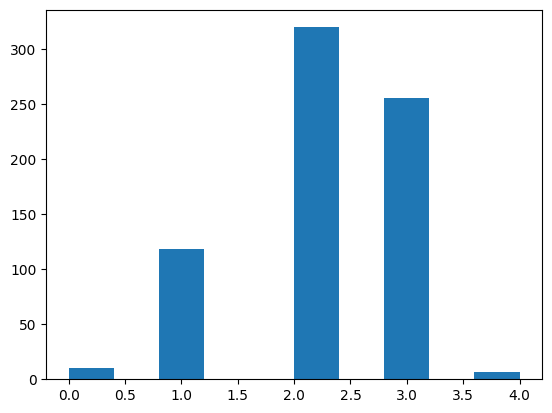

In [173]:
plt.hist(df_FinalScore['FinalScore'],bins=10)

In [136]:
round(11/3)

4

In [157]:
company['DLTR']['balance']

company        yahoo_sector       gics_sector         industry  \
574    DLTR  Consumer Defensive  Consumer Staples  Discount Stores   
575    DLTR  Consumer Defensive  Consumer Staples  Discount Stores   
576    DLTR  Consumer Defensive  Consumer Staples  Discount Stores   
577    DLTR  Consumer Defensive  Consumer Staples  Discount Stores   

        st_date st_YR st_Mnth  cashEquivalent  receivables  finishedGoods  \
574  2020-01-31  2020      01    539200000.00 113300000.00  3522000000.00   
575  2021-01-31  2021      01   1416700000.00         0.00  3427000000.00   
576  2022-01-31  2022      01    984900000.00         0.00  4367300000.00   
577  2023-01-31  2023      01    642800000.00         0.00  5449300000.00   

     workInProcess  rawMaterials  otherCurrentAssets     inventory  \
574           0.00          0.00        208200000.00 3522000000.00   
575           0.00          0.00        207100000.00 3427000000.00   
576           0.00          0.00        257000000.00 4367300000.00   
577           0.00          0.00        275000000.00 5449300000.00   

     currentAssets         netPPE  otherNonCurrentAssets  financialAssets  \
574  4269400000.00 10106800000.00            90700000.00             0.00   
575  5050800000.00 10440400000.00            97200000.00             0.00   
576  5609200000.00 10902600000.00           105300000.00             0.00   
577  6367100000.00 11430200000.00           126700000.00             0.00   

         goodwill  goodwillAndOtherIntangibleAssets  otherIntangibleAssets  \
574 1983300000.00                     5083300000.00          3100000000.00   
575 1984400000.00                     5084400000.00          3100000000.00   
576 1984400000.00                     5084400000.00          3100000000.00   
577 1983100000.00                     5083100000.00          3100000000.00   

     nonCurrentAccountsReceivable  totalNonCurrentAssets   currentDebt  \
574                          0.00         15305200000.00 1529300000.00   
575                          0.00         15645200000.00 1348200000.00   
576                          0.00         16112600000.00 1407800000.00   
577                          0.00         16655000000.00 1449600000.00   

     payablesAndAccruedExpenses  otherCurrentLiabilities  currentLiabilities  \
574               1399200000.00             618000000.00       3546500000.00   
575               1566800000.00             815300000.00       3730300000.00   
576               1966800000.00             802000000.00       4176600000.00   
577               1957900000.00             817700000.00       4225200000.00   

     longTermDebt  otherNonCurrentLiabilities  nonCurrentDeferredLiabilities  \
574 8501700000.00                258000000.00                   984700000.00   
575 8291700000.00                352600000.00                  1013500000.00   
576 8562500000.00                256100000.00                   987200000.00   
577 8676900000.00                245400000.00                  1105700000.00   

     nonCurrentDeferredTaxesLiabilities  longTermProvisions  \
574                        984700000.00                0.00   
575                       1013500000.00                0.00   
576                        987200000.00                0.00   
577                       1105700000.00                0.00   

     totalNonCurrentLiabilities  retainedEarnings  stockholdersEquity  \
574               9773300000.00     3837800000.00       6254800000.00   
575               9680400000.00     5179700000.00       7285300000.00   
576               9826700000.00     6507600000.00       7718500000.00   
577              10045400000.00     8123000000.00       8751500000.00   

         totalDebt    totalAssets  totalLiabilities  workingCapital  \
574 10031000000.00 19574600000.00    13319800000.00    722900000.00   
575  9639900000.00 20696000000.00    13410700000.00   1320500000.00   
576  9970300000.00 21721800000.00    14003300000.00   1432600000.00   


In [180]:

df_FinalScore[mask].sort_values(by='FinalScore')

company                            industry  FinalScore  cashScore  \
134    CNXC     Information Technology Services           4          4   
343     KNX                            Trucking           4          4   
396    MKSI  Scientific & Technical Instruments           4          4   
476    PAYC                Software—Application           4          4   
648    UTHR                       Biotechnology           4          4   
679     WLK                 Specialty Chemicals           4          4   
696       X                               Steel           4          4   

     incomeScore  balanceScore  
134            4             4  
343            4             4  
396            4             4  
476            4             4  
648            4             4  
679            4             4  
696            4             4

## Save Data

In [178]:
Label_Scores = {}
Label_Scores['companyData'] = company
Label_Scores['finalScore'] = df_FinalScore
Label_Scores['cashScore'] = df_cashScore
Label_Scores['balanceScore'] = df_balanceScore


In [179]:
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_label_scores.pkl')
with open(filepath,'wb') as f:
    pickle.dump(Label_Scores,f)

In [182]:
filepath=os.path.join(DATA_ROOT_DIR,'data/export','yahoo_data_labels.csv')
df_FinalScore.to_csv(filepath,index=False)